In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
pd.options.display.max_columns=25
pd.options.display.max_rows=100

from sklearn.preprocessing import normalize
import hdbscan
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 350

%matplotlib inline


In [2]:
df=pd.read_csv('wa_school_district_data.csv',index_col='DistrictName')

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 350

Follow up graphing

In [4]:
sbac=df[df.sbac_pass_all.notnull()&\
       (df.sbac_pass_white.notnull()|\
        df.sbac_pass_black.notnull()|\
        df.sbac_pass_latinx.notnull()|\
        df.sbac_pass_asian.notnull())]

sbac=sbac[['sbac_pass_all',
           'sbac_pass_black',
           'sbac_pass_latinx',
           'sbac_pass_white',
           'sbac_pass_asian']]

sbac=sbac.sort_values('sbac_pass_all', ascending=False)

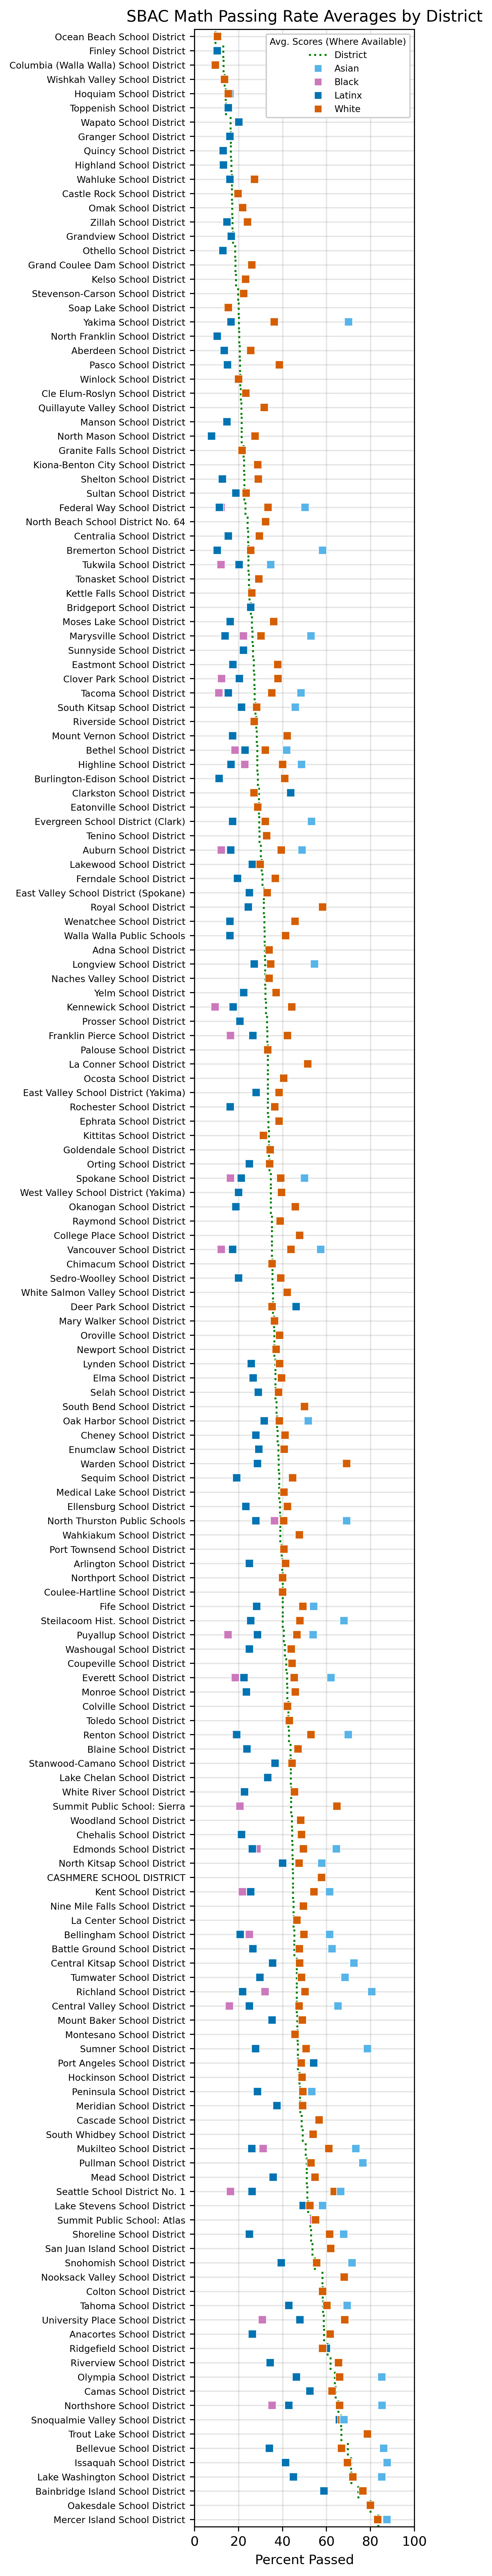

In [5]:
from matplotlib.lines import Line2D
pal=sns.color_palette("colorblind")

legend_elements = [Line2D([0], [0], color= 'g', linestyle=':', label='District'),
                   Line2D([0], [0], markerfacecolor=pal[9], marker='s', color='w', label='Asian'),
                   Line2D([0], [0], markerfacecolor=pal[4], marker='s', color='w', label='Black'),
                   Line2D([0], [0], markerfacecolor=pal[0], marker='s', color='w', label='Latinx'),
                   Line2D([0], [0], markerfacecolor=pal[3], marker='s', color='w', label='White')]

i=0
plt.figure(figsize=(3,35))
n=len(sbac.index)
plt.ylim(0,len(sbac.index))
plt.xlim(0,1)

for i in range(n):    
    #district average
    plt.axvline(x=sbac.iloc[i,0],ymin=i/(n),ymax=(i+1)/(n), linestyle=':', color='g')
    #black
    plt.plot(sbac.iloc[i,1], (i+.5), c=pal[4], marker='s', mec='w', mew=.5)
    #latinx
    plt.plot(sbac.iloc[i,2], (i+.5), c=pal[0], marker='s', mec='w', mew=.5)
    #white
    plt.plot(sbac.iloc[i,3], (i+.5), c=pal[3], marker='s', mec='w', mew=.5)
    #asian
    plt.plot(sbac.iloc[i,4], (i+.5), c=pal[9], marker='s', mec='w', mew=.5)
    
plt.yticks(ticks=np.arange(.5,n+.5,1),labels=sbac.index, fontsize=7);
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=.2)
plt.legend(handles=legend_elements,
           title='Avg. Scores (Where Available)', 
           fontsize='x-small',
           title_fontsize='x-small',
           framealpha=1);
plt.title('SBAC Math Passing Rate Averages by District')
plt.xlabel('Percent Passed')
plt.xticks(ticks=np.arange(0,1.2,.2), labels=range(0,120,20));

In [6]:
df['students_per_teacher']=df.student_count/df.num_teachers

In [7]:
df_clusvars=df[['spending_per_student', 
                'students_per_teacher', 
                'teacher_percent_black', 
                'teacher_percent_latinx', 
                'teacher_percent_white', 
                'teacher_percent_asian', 
                'teacher_percent_unknown_demographic', 
                'teacher_percent_inexperienced', 
                'teacher_percent_limited_cert', 
                'teacher_percent_out_of_field', 
                'percent_black', 
                'percent_latinx', 
                'percent_white', 
                'percent_asian', 
                'sbac_pass_all']]
df_clusvars=df_clusvars.query("sbac_pass_all.notnull()",engine='python')

In [8]:
to_cluster=df_clusvars.loc[:,'spending_per_student':'sbac_pass_all']

In [9]:
from sklearn.preprocessing import normalize

def normalize_dataframe(df, axis="rows"):
    if axis=='rows':
        normed=pd.DataFrame(normalize(df,axis=1), index=df.index, columns=df.columns)
    if axis=='columns':
        normed=pd.DataFrame(normalize(df,axis=0), index=df.index, columns=df.columns)
    if axis=='both':
        normed=pd.DataFrame(normalize(df, axis=1), index=df.index, columns=df.columns)
        normed=pd.DataFrame(normalize(normed, axis=0), index=normed.index, columns=normed.columns)

    return normed


In [10]:
#to_cluster_normed=pd.DataFrame(normalize(to_cluster,axis=0),index=to_cluster.index,columns=to_cluster.columns)

In [11]:
to_cluster_normed=normalize_dataframe(to_cluster,axis='rows')

In [12]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=7, 
                        cluster_selection_method='leaf'
                       )
clusterer.fit_predict(to_cluster_normed)

array([-1,  3,  4,  1,  3,  4,  4,  4, -1,  2,  1,  4, -1, -1, -1, -1,  1,
        1, -1,  4,  1,  4, -1,  4,  3,  3,  4, -1,  3, -1,  4, -1, -1, -1,
       -1,  4,  1, -1,  0,  4, -1, -1, -1, -1, -1,  0, -1,  4, -1, -1, -1,
        4,  3,  4, -1,  3,  1,  4,  4, -1, -1,  4,  1,  4,  4,  3,  4, -1,
       -1, -1,  4, -1, -1,  1, -1, -1, -1,  3,  4,  1, -1,  1,  4,  4, -1,
        0,  4,  1, -1,  1, -1,  3,  0,  1, -1, -1, -1,  2,  4,  1,  4, -1,
       -1, -1,  1,  1, -1, -1,  2,  2, -1,  4,  4,  3, -1,  4,  4,  4, -1,
       -1,  4,  4,  3,  0, -1,  4, -1,  0, -1,  2,  0, -1,  3, -1,  3, -1,
       -1, -1, -1, -1, -1,  0,  0,  4,  4,  4,  2, -1,  1,  1,  4,  1, -1,
        1,  2,  1, -1,  0, -1,  1,  0,  4,  1,  3, -1, -1, -1, -1,  2,  4,
       -1,  4, -1,  4, -1,  4,  4,  0,  2,  2,  4, -1,  3,  1,  2,  4, -1,
       -1, -1,  1, -1,  4, -1,  0,  1,  4,  4, -1,  0,  3,  0, -1,  3,  1,
        3,  0, -1, -1, -1, -1,  4,  0,  0,  4,  1, -1, -1,  3, -1,  2,  4,
       -1,  4, -1,  1, -1

Text(0.5, 1.03, 'HDBSCAN Condensed Tree Plot for Cluster Selection')

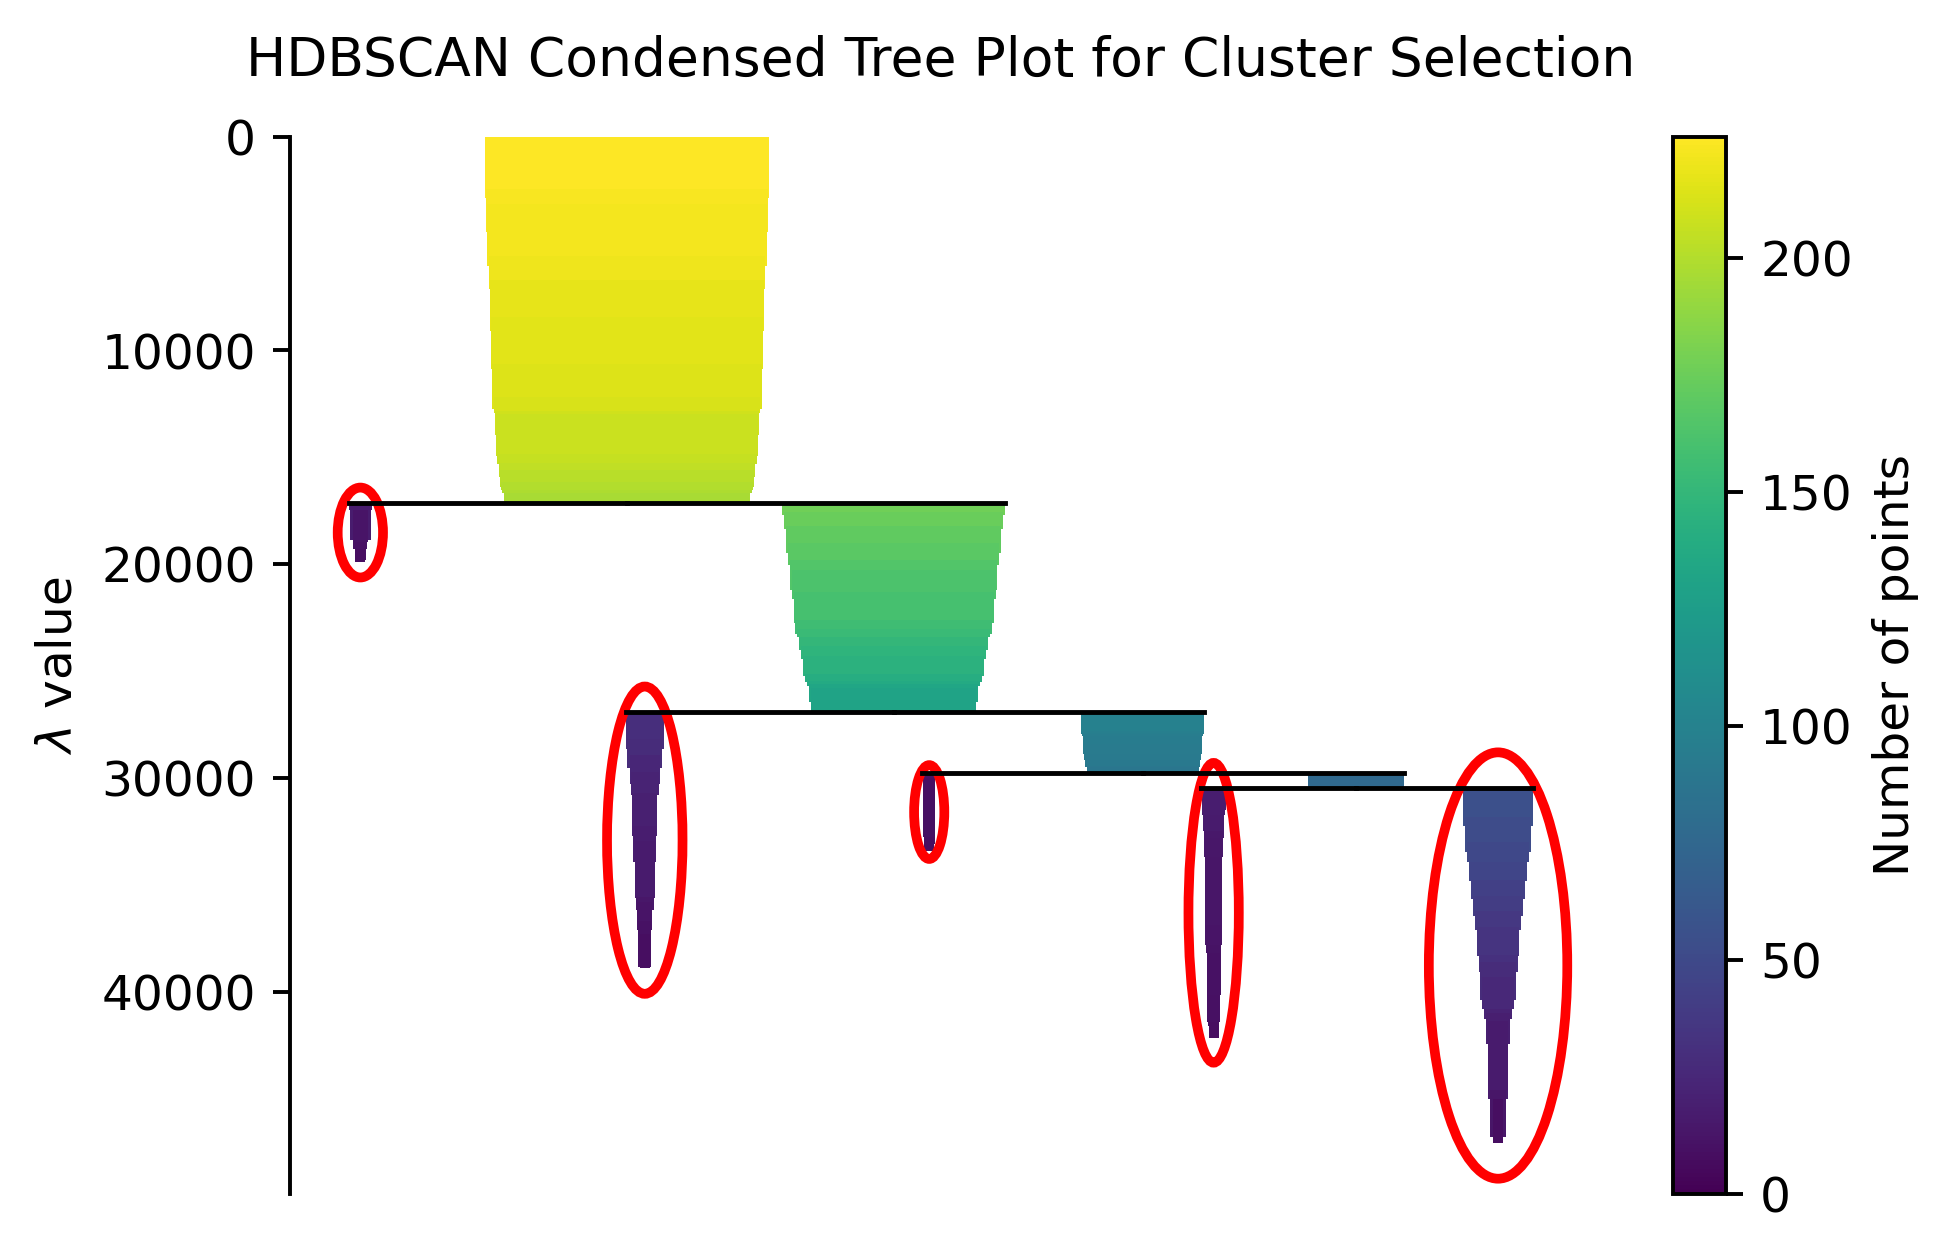

In [13]:
clusterer.condensed_tree_.plot(select_clusters=True)
plt.title('HDBSCAN Condensed Tree Plot for Cluster Selection', y=1.03, size=11)

In [14]:
df_clusvars['cluster_num']=clusterer.labels_+1

In [15]:
df['cluster_num']=df_clusvars.cluster_num

In [16]:
clusters=[list(to_cluster[clusterer.labels_==i].index) for i in range(-1,clusterer.labels_.max()+1)]

In [17]:
print( [(i, len(clusters[i])) for i in range(6)])

[(0, 91), (1, 18), (2, 30), (3, 12), (4, 20), (5, 55)]


In [18]:
for group in clusters:
    print(group,'\n\n')
    display(df.loc[group,:].describe())

['Aberdeen School District', 'Bellevue School District', 'Bremerton School District', 'Brewster School District', 'Bridgeport School District', 'Burlington-Edison School District', 'Cape Flattery School District', 'Central Valley School District', 'Chimacum School District', 'Cle Elum-Roslyn School District', 'Colfax School District', 'College Place School District', 'Colton School District', 'Columbia (Stevens) School District', 'Concrete School District', 'Crescent School District', 'Creston School District', 'Curlew School District', 'Cusick School District', 'Davenport School District', 'Deer Park School District', 'East Valley School District (Yakima)', 'Eastmont School District', 'Eatonville School District', 'Entiat School District', 'Excel Public Charter School', 'Federal Way School District', 'Grand Coulee Dam School District', 'Grandview School District', 'Granger School District', 'Highland School District', 'Highline School District', 'Hoquiam School District', 'Inchelium S

student_FTE  total_spending  spending_per_student  num_teachers  \
count     91.000000    9.100000e+01             91.000000     91.000000   
mean    5012.120220    7.218862e+07          15431.416906    304.527473   
std     8595.902284    1.308432e+08           3254.950813    541.484181   
min       94.160000    2.807276e+06          10245.313540     12.000000   
25%      509.705000    7.674406e+06          13608.015877     39.500000   
50%     1492.390000    1.884049e+07          14584.318269     87.000000   
75%     4531.755000    6.484207e+07          16180.586724    284.000000   
max    54537.390000    9.136878e+08          29813.891461   3745.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              91.000000               91.000000              91.000000   
mean                0.013351                0.069237               0.852616   
std                 0.032511                0.093949               0.127238   
min                 0.000000                0.000000               0.437500   
25%                 0.000000                0.009282               0.787879   
50%                 0.000000                0.038304               0.888072   
75%                 0.011159                0.085859               0.946287   
max                 0.200000                0.446429               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              91.000000                            91.000000   
mean                0.019106                             0.023573   
std                 0.028619                             0.052253   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.008427                             0.008208   
75%                 0.027330                             0.023785   
max                 0.125000                             0.407407   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      91.000000                     91.000000   
mean                        0.297956                      0.090802   
std                         0.137322                      0.067024   
min                         0.037000                      0.000000   
25%                         0.206000                      0.043500   
50%                         0.285000                      0.074000   
75%                         0.358500                      0.116000   
max                         0.765000                      0.333000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     91.000000      91.000000      91.000000   
mean                       0.150165    5096.000000       0.033321   
std                        0.084303    8729.047509       0.075235   
min                        0.000000      92.000000       0.000000   
25%                        0.086000     517.500000       0.002778   
50%                        0.132000    1560.000000       0.006154   
75%                        0.207500    4650.000000       0.019040   
max                        0.400000   55344.000000       0.396825   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       91.000000      91.000000      91.000000           91.000000   
mean         0.309344       0.516960       0.039077          355.252747   
std          0.299408       0.291397       0.078804          596.775886   
min          0.005747       0.020166       0.000000           10.000000   
25%          0.086844       0.254619       0.003351           42.000000   
50%          0.151786       0.537366       0.009481           98.000000   
75%          0.477748       0.782048       0.020289          307.500000   
max          0.977461       0.925287       0.407080         3610.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

['Coulee-Hartline School District', 'Dayton School District', 'La Conner School District', 'Lyle School District', 'Northport School District', 'Oakville School District', 'Odessa School District', 'Pateros School District', 'Pe Ell School District', 'Republic School District', 'Ritzville School District', 'South Bend School District', 'Tekoa School District', 'Touchet School District', 'Trout Lake School District', 'Wahkiakum School District', 'Waterville School District', 'Wellpinit School District #49'] 




student_FTE  total_spending  spending_per_student  num_teachers  \
count    18.000000    1.800000e+01             18.000000     18.000000   
mean    327.993333    5.801307e+06          17538.093786     29.555556   
std     128.328266    2.637550e+06           1983.441560     14.147218   
min     200.800000    3.272410e+06          14318.478658     17.000000   
25%     234.095000    4.005655e+06          16598.556327     20.250000   
50%     273.530000    4.838065e+06          17478.382901     23.500000   
75%     377.517500    6.719078e+06          18137.463960     34.000000   
max     602.930000    1.329641e+07          22052.992387     68.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              18.000000               18.000000              18.000000   
mean                0.013617                0.018316               0.916695   
std                 0.030140                0.024975               0.102598   
min                 0.000000                0.000000               0.588235   
25%                 0.000000                0.000000               0.920769   
50%                 0.000000                0.000000               0.950000   
75%                 0.011029                0.045714               0.965000   
max                 0.117647                0.058824               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count                   18.0                            18.000000   
mean                     0.0                             0.031943   
std                      0.0                             0.080687   
min                      0.0                             0.000000   
25%                      0.0                             0.000000   
50%                      0.0                             0.000000   
75%                      0.0                             0.014423   
max                      0.0                             0.323529   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      18.000000                     18.000000   
mean                        0.229278                      0.072389   
std                         0.101798                      0.058274   
min                         0.048000                      0.000000   
25%                         0.168750                      0.031750   
50%                         0.236000                      0.066000   
75%                         0.290500                      0.089000   
max                         0.476000                      0.194000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     18.000000      18.000000      18.000000   
mean                       0.199278     342.666667       0.004653   
std                        0.066337     144.371661       0.005354   
min                        0.087000     193.000000       0.000000   
25%                        0.156750     234.500000       0.000000   
50%                        0.208000     290.500000       0.004182   
75%                        0.228750     403.500000       0.005126   
max                        0.321000     664.000000       0.019084   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       18.000000      18.000000      18.000000           18.000000   
mean         0.177601       0.673587       0.009371           25.444444   
std          0.159343       0.223604       0.009655           14.476034   
min          0.020725       0.095122       0.000000           10.000000   
25%          0.100246       0.487034       0.003411           16.500000   
50%          0.122063       0.776570       0.007641           20.500000   
75%          0.171130       0.823475       0.011320           27.750000   
max          0.562112       0.953368       0.036810           63.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_white  \
c

['Arlington School District', 'Bethel School District', 'CASHMERE SCHOOL DISTRICT', 'Camas School District', 'Castle Rock School District', 'Colville School District', 'Ephrata School District', 'Fife School District', 'Hockinson School District', 'Kennewick School District', 'Kettle Falls School District', 'Lake Stevens School District', 'Lakewood School District', 'Lynden School District', 'Mead School District', 'Monroe School District', 'Montesano School District', 'Pullman School District', 'Puyallup School District', 'Quillayute Valley School District', 'Rainier School District', 'Reardan-Edwall School District', 'Ridgefield School District', 'Riverview School District', 'Steilacoom Hist. School District', 'Sumner School District', 'Tenino School District', 'University Place School District', 'West Valley School District (Yakima)', 'Yelm School District'] 




student_FTE  total_spending  spending_per_student  num_teachers  \
count     30.000000    3.000000e+01             30.000000     30.000000   
mean    5647.261000    7.373851e+07          12986.259922    321.833333   
std     5836.512539    7.675118e+07            486.336535    333.905013   
min      605.400000    8.165761e+06          11595.701036     35.000000   
25%     1878.137500    2.486790e+07          12718.216529    105.000000   
50%     3379.215000    4.300972e+07          13031.280510    190.000000   
75%     6476.272500    8.780157e+07          13339.303896    352.500000   
max    23262.540000    3.013337e+08          13733.031318   1315.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              30.000000               30.000000              30.000000   
mean                0.006435                0.024119               0.927123   
std                 0.008597                0.019527               0.042310   
min                 0.000000                0.000000               0.847909   
25%                 0.000000                0.012025               0.893149   
50%                 0.004308                0.025158               0.939824   
75%                 0.011227                0.030531               0.959334   
max                 0.027322                0.101680               0.985185   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              30.000000                            30.000000   
mean                0.013209                             0.011856   
std                 0.011574                             0.012895   
min                 0.000000                             0.000000   
25%                 0.006583                             0.000000   
50%                 0.012291                             0.009285   
75%                 0.016170                             0.018928   
max                 0.043716                             0.040609   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      30.000000                     30.000000   
mean                        0.241333                      0.047733   
std                         0.061854                      0.030205   
min                         0.114000                      0.000000   
25%                         0.206750                      0.024250   
50%                         0.233000                      0.050000   
75%                         0.284500                      0.057750   
max                         0.355000                      0.123000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     30.000000      30.000000      30.000000   
mean                       0.091100    5726.633333       0.020762   
std                        0.040552    5884.762964       0.024374   
min                        0.000000     625.000000       0.000000   
25%                        0.073250    1876.250000       0.006020   
50%                        0.086500    3381.000000       0.009413   
75%                        0.120000    6660.750000       0.025497   
max                        0.183000   23162.000000       0.093359   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       30.000000      30.000000      30.000000           30.000000   
mean         0.161644       0.692508       0.028980          407.266667   
std          0.091761       0.128576       0.028445          418.641640   
min          0.035200       0.454924       0.001600           40.000000   
25%          0.094152       0.590929       0.009583          126.000000   
50%          0.143223       0.695944       0.018821          257.500000   
75%          0.203318       0.793622       0.036106          467.250000   
max          0.396592       0.880000       0.098164         1717.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

['Bellingham School District', 'Mary Walker School District', 'Mossyrock School District', 'Mount Baker School District', 'Ocosta School District', 'Port Townsend School District', 'Raymond School District', 'Sedro-Woolley School District', 'South Kitsap School District', 'South Whidbey School District', 'Stevenson-Carson School District', 'Willapa Valley School District'] 




student_FTE  total_spending  spending_per_student  num_teachers  \
count     12.000000    1.200000e+01             12.000000     12.000000   
mean    2850.730000    4.181875e+07          15400.781696    196.666667   
std     3943.431473    5.573340e+07            957.194048    276.327978   
min      360.050000    6.235550e+06          13862.635822     24.000000   
25%      541.482500    8.553785e+06          14577.865669     36.500000   
50%     1058.040000    1.572319e+07          15410.498732     73.500000   
75%     2561.827500    3.973693e+07          15833.079556    169.500000   
max    11838.910000    1.641185e+08          17318.565755    832.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              12.000000               12.000000              12.000000   
mean                0.003167                0.010262               0.933517   
std                 0.005473                0.012437               0.039843   
min                 0.000000                0.000000               0.862069   
25%                 0.000000                0.000000               0.922621   
50%                 0.000000                0.003968               0.938095   
75%                 0.005049                0.021010               0.953533   
max                 0.016667                0.032258               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              12.000000                            12.000000   
mean                0.013193                             0.019880   
std                 0.012181                             0.029051   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.011519                             0.005409   
75%                 0.019377                             0.028604   
max                 0.032258                             0.080460   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      12.000000                     12.000000   
mean                        0.219583                      0.053167   
std                         0.059264                      0.030611   
min                         0.097000                      0.000000   
25%                         0.189750                      0.029750   
50%                         0.244000                      0.054000   
75%                         0.258250                      0.077000   
max                         0.292000                      0.095000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     12.000000      12.000000      12.000000   
mean                       0.147750    2886.916667       0.007540   
std                        0.066542    3965.649080       0.004550   
min                        0.052000     401.000000       0.000000   
25%                        0.110500     567.750000       0.004647   
50%                        0.134000    1091.500000       0.007190   
75%                        0.166500    2605.000000       0.009921   
max                        0.318000   12070.000000       0.015327   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       12.000000      12.000000      12.000000           12.000000   
mean         0.161277       0.716742       0.018079          202.083333   
std          0.074726       0.079080       0.019276          271.809579   
min          0.075610       0.591453       0.001572           20.000000   
25%          0.106938       0.681010       0.005182           36.750000   
50%          0.137321       0.694663       0.009820           91.000000   
75%          0.216066       0.786633       0.022565          179.000000   
max          0.294017       0.830424       0.058120          837.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

['Adna School District', 'Asotin-Anatone School District', 'Chehalis School District', 'Cheney School District', 'Clarkston School District', 'Ellensburg School District', 'Enumclaw School District', 'Freeman School District', 'Kalama School District', 'Longview School District', 'Napavine School District', 'North Thurston Public Schools', 'Olympia School District', 'Onalaska School District', 'Rochester School District', 'Stanwood-Camano School District', 'Toutle Lake School District', 'Tumwater School District', 'Vancouver School District', 'White Salmon Valley School District'] 




student_FTE  total_spending  spending_per_student  num_teachers  \
count     20.00000    2.000000e+01             20.000000     20.000000   
mean    4715.21000    6.366911e+07          13323.488551    282.800000   
std     5739.81567    7.861642e+07            522.493697    346.491376   
min      634.19000    8.251590e+06          12323.271200     39.000000   
25%      884.26000    1.105987e+07          13021.742037     56.750000   
50%     2887.53500    3.974723e+07          13410.777675    169.000000   
75%     5473.51000    7.059578e+07          13723.824341    335.500000   
max    23221.82000    3.192293e+08          14094.967587   1406.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              20.000000               20.000000              20.000000   
mean                0.002278                0.019237               0.941730   
std                 0.004347                0.019579               0.044618   
min                 0.000000                0.000000               0.844828   
25%                 0.000000                0.005556               0.917378   
50%                 0.000000                0.014887               0.947293   
75%                 0.002636                0.024471               0.974672   
max                 0.013514                0.075472               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              20.000000                            20.000000   
mean                0.008383                             0.012549   
std                 0.010933                             0.030498   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.002137                             0.001366   
75%                 0.016368                             0.011842   
max                 0.036273                             0.137931   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      20.000000                     20.000000   
mean                        0.211100                      0.051200   
std                         0.057136                      0.034189   
min                         0.122000                      0.000000   
25%                         0.171750                      0.032500   
50%                         0.186500                      0.043500   
75%                         0.247500                      0.056250   
max                         0.321000                      0.145000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     20.000000      20.000000      20.000000   
mean                       0.097600    4755.900000       0.012410   
std                        0.064929    5796.735187       0.011274   
min                        0.024000     643.000000       0.000000   
25%                        0.046500     897.000000       0.004568   
50%                        0.077500    2909.500000       0.010478   
75%                        0.128750    5557.500000       0.016469   
max                        0.265000   23569.000000       0.047991   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       20.000000      20.000000      20.000000            20.00000   
mean         0.144074       0.750314       0.018044           346.20000   
std          0.075269       0.113144       0.019220           408.27153   
min          0.056130       0.498490       0.003425            46.00000   
25%          0.084827       0.667858       0.007310            68.75000   
50%          0.122396       0.759829       0.011333           230.50000   
75%          0.199312       0.835794       0.018710           381.50000   
max          0.321094       0.900442       0.073499          1624.00000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_white  \
c

['Anacortes School District', 'Auburn School District', 'Bainbridge Island School District', 'Battle Ground School District', 'Blaine School District', 'Cascade School District', 'Central Kitsap School District', 'Centralia School District', 'Chewelah School District', 'Clover Park School District', 'Columbia (Walla Walla) School District', 'Coupeville School District', 'East Valley School District (Spokane)', 'Edmonds School District', 'Elma School District', 'Everett School District', 'Evergreen School District (Clark)', 'Ferndale School District', 'Finley School District', 'Franklin Pierce School District', 'Goldendale School District', 'Granite Falls School District', 'Kelso School District', 'Kiona-Benton City School District', 'Kittitas School District', 'Lake Chelan School District', 'Marysville School District', 'Medical Lake School District', 'Mukilteo School District', 'Naches Valley School District', 'Newport School District', 'Nine Mile Falls School District', 'Nooksack Val

student_FTE  total_spending  spending_per_student  num_teachers  \
count     55.000000    5.500000e+01             55.000000     55.000000   
mean    6081.882705    8.890049e+07          14366.041672    376.290909   
std     7493.337173    1.120008e+08            684.731249    461.561908   
min      331.760000    5.208576e+06          12835.794388     22.000000   
25%     1295.080000    1.786045e+07          13811.908131     86.000000   
50%     2753.060000    3.886746e+07          14331.181690    159.000000   
75%     7931.040000    1.156507e+08          14891.116948    495.500000   
max    30917.280000    4.569661e+08          15724.925007   1967.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              55.000000               55.000000              55.000000   
mean                0.007055                0.028960               0.912537   
std                 0.011947                0.023965               0.050457   
min                 0.000000                0.000000               0.750000   
25%                 0.000000                0.014011               0.887288   
50%                 0.000000                0.027634               0.925620   
75%                 0.010839                0.040253               0.948167   
max                 0.056462                0.116959               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              55.000000                            55.000000   
mean                0.013163                             0.017820   
std                 0.014436                             0.023226   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.007874                             0.011364   
75%                 0.021646                             0.022221   
max                 0.053381                             0.117188   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      55.000000                     55.000000   
mean                        0.259673                      0.058055   
std                         0.067836                      0.030283   
min                         0.144000                      0.013000   
25%                         0.219500                      0.037000   
50%                         0.244000                      0.051000   
75%                         0.281000                      0.078000   
max                         0.485000                      0.147000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     55.000000      55.000000      55.000000   
mean                       0.118727    6184.145455       0.021100   
std                        0.053931    7622.333225       0.030802   
min                        0.044000     382.000000       0.000000   
25%                        0.079000    1321.000000       0.004703   
50%                        0.102000    2703.000000       0.008917   
75%                        0.137500    7973.500000       0.016742   
max                        0.265000   31070.000000       0.136094   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       55.000000      55.000000      55.000000           55.000000   
mean         0.206577       0.651979       0.029912          431.272727   
std          0.125316       0.154290       0.038163          510.806496   
min          0.041290       0.300442       0.001693           21.000000   
25%          0.107963       0.547908       0.006603          100.000000   
50%          0.198997       0.677124       0.010989          197.000000   
75%          0.287912       0.768029       0.036672          540.500000   
max          0.554865       0.884817       0.153354         1950.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

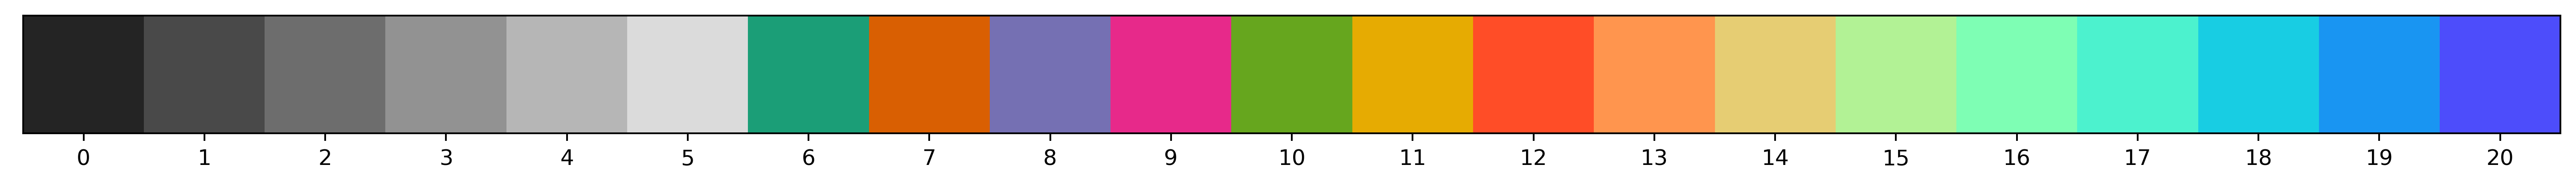

In [19]:
colors=(sns.color_palette('gray')+sns.color_palette('Dark2',n_colors=6)+sns.color_palette('rainbow_r',n_colors=9))
sns.palplot(colors,)
plt.xticks(ticks=range(21),labels=range(21));

In [20]:
colors=[colors[i] for i in [1,6,7,8,19,11,12,15,16,19,20]]


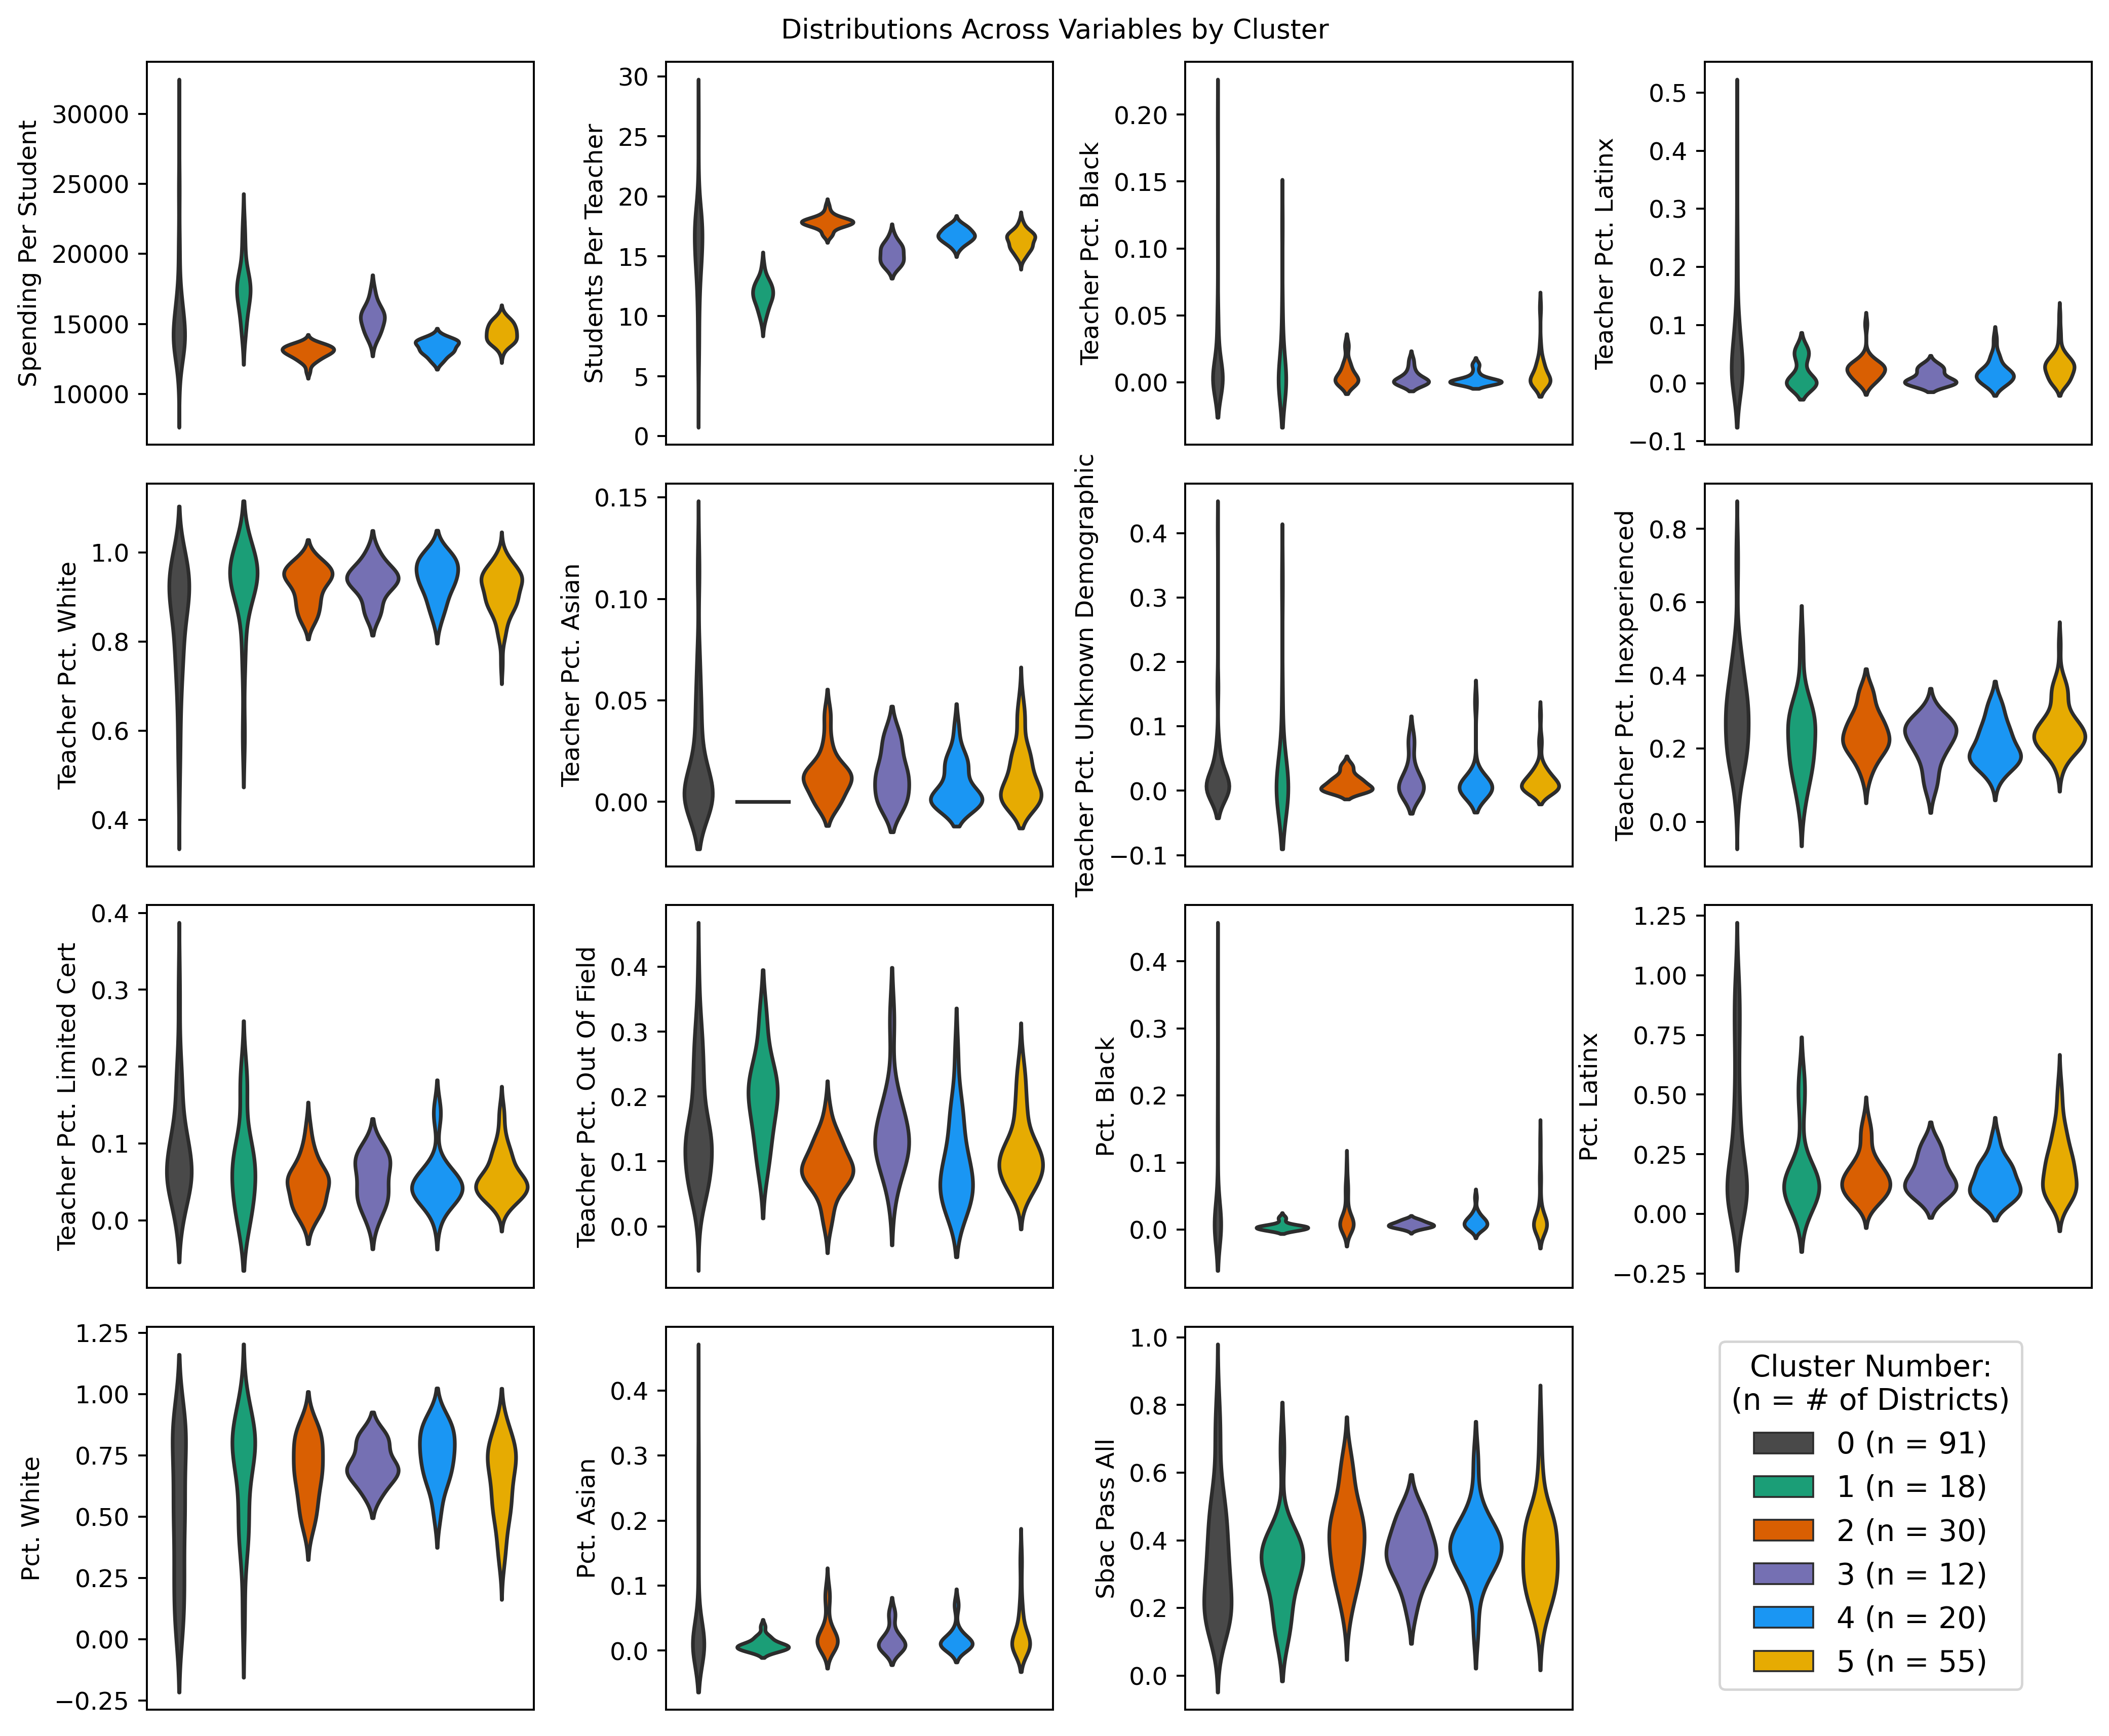

In [21]:
def snake_case_to_title(s):
    return s.replace('_', ' ').title()

i=0
plt.figure(figsize=(12,10))
for col in df_clusvars.columns:
    plt.subplot(4,4,i+1)
    ax=sns.violinplot(data=df_clusvars, 
                      y=col,x='cluster_num', 
                      hue='cluster_num' if i==15 else None,
                      palette=colors,
                      inner=None,
                      saturation=1)
    ax.set_xticks([])
    ax.set_xlabel('')
    if i==15:
        ax.remove()
        global hands, labs
        hands, labs=ax.get_legend_handles_labels()

    i=i+1
    ax.set_ylabel(snake_case_to_title(ax.get_ylabel()).replace('Percent', 'Pct.'))

plt.subplot(4,4,16)
plt.legend(handles=hands, labels=['{} (n = {})'.format(i, len(clusters[i])) for i in range(6)],
           title="  Cluster Number: \n(n = # of Districts)", title_fontsize=12, loc="upper left", prop={'size':12})
plt.axis("off")
plt.tight_layout()
plt.suptitle('Distributions Across Variables by Cluster', y=1.01, size=11);

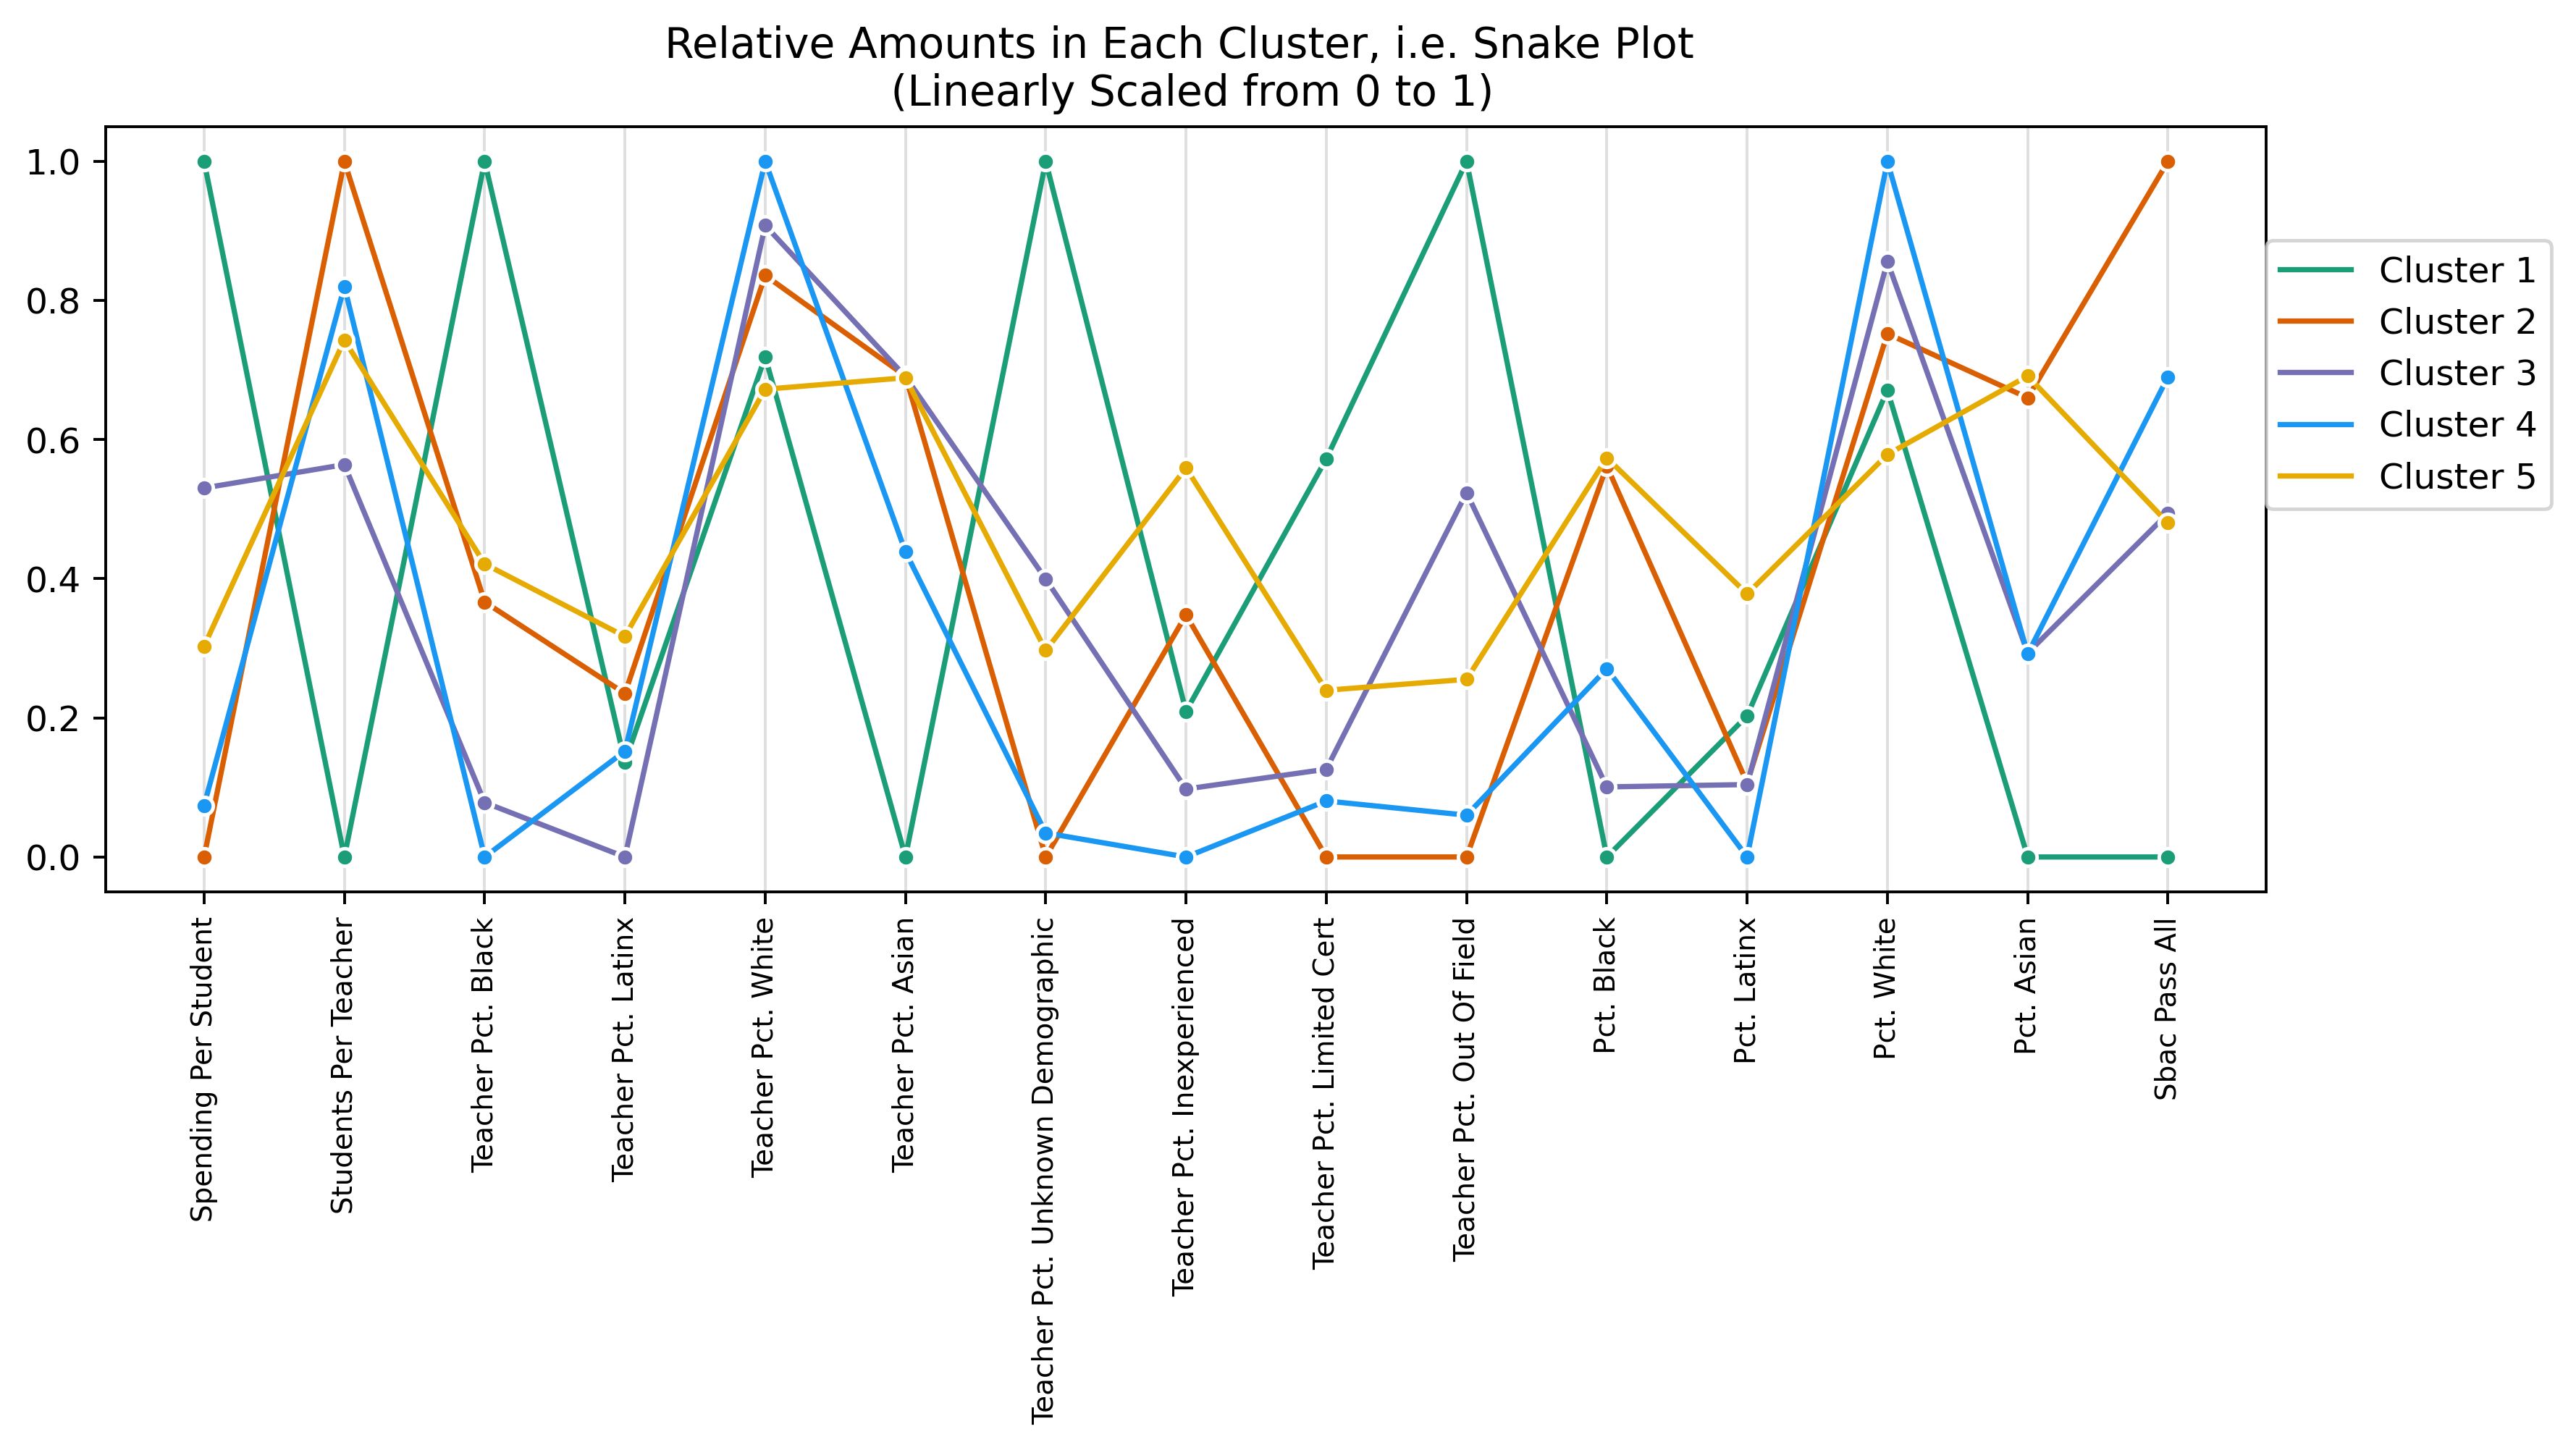

In [22]:
def lin_norm(col):
    return (col-col.min())/(col.max()-col.min())

df_clusvars.groupby('cluster_num').mean()


snake_data=df_clusvars.groupby('cluster_num').mean().apply(lin_norm, axis=0)

plt.figure(figsize=(11,4))

for i in range(5): 
    plt.plot(snake_data.loc[i+1,:],c=colors[i+1], marker='o', markersize=5, markeredgecolor='w')

legend_elements = [Line2D([0], [0], color=colors[i+1], label='Cluster {}'.format(i+1)) for i in range(5)]

plt.title('Relative Amounts in Each Cluster, i.e. Snake Plot \n (Linearly Scaled from 0 to 1)')
plt.legend(handles=legend_elements, title=[], loc=(1,.5));

plt.grid(True, which='Both', axis='x', alpha=.4)
plt.xticks(ticks=range(15),
           labels=[snake_case_to_title(i).replace('Percent', 'Pct.') for i in df_clusvars.columns[:-1]],
           size=8
          )

plt.xticks(rotation=90);


In [23]:
df.describe()

student_FTE  total_spending  spending_per_student  num_teachers  \
count    307.000000    3.070000e+02            307.000000    307.000000   
mean    3630.153774    5.172962e+07          17086.319864    221.977199   
std     6584.480997    9.732641e+07           6870.427301    406.795274   
min        6.400000    3.256184e+05          10245.313540      1.000000   
25%      230.400000    4.021108e+06          13584.264018     21.000000   
50%      902.250000    1.305917e+07          14662.117585     61.000000   
75%     3585.820000    4.965305e+07          17237.185678    213.500000   
max    54537.390000    9.136878e+08          53609.980925   3745.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count             307.000000              307.000000             307.000000   
mean                0.008971                0.036790               0.900284   
std                 0.025166                0.064343               0.107255   
min                 0.000000                0.000000               0.437500   
25%                 0.000000                0.000000               0.872253   
50%                 0.000000                0.016393               0.933333   
75%                 0.007074                0.043091               0.971326   
max                 0.200000                0.446429               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count             307.000000                           307.000000   
mean                0.012327                             0.018370   
std                 0.024823                             0.042132   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.000000                             0.000000   
75%                 0.014983                             0.018613   
max                 0.200000                             0.407407   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                     307.000000                    307.000000   
mean                        0.267554                      0.080026   
std                         0.148660                      0.079451   
min                         0.000000                      0.000000   
25%                         0.185000                      0.033500   
50%                         0.246000                      0.058000   
75%                         0.322500                      0.098000   
max                         1.000000                      0.538000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                    307.000000     307.000000     307.000000   
mean                       0.143029    3688.798046       0.025498   
std                        0.092093    6682.224640       0.069831   
min                        0.000000       5.000000       0.000000   
25%                        0.076000     232.500000       0.001872   
50%                        0.124000     908.000000       0.006479   
75%                        0.204000    3652.000000       0.014729   
max                        0.429000   55344.000000       0.758893   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count      307.000000     307.000000     307.000000          226.000000   
mean         0.214263       0.627993       0.024296          345.455752   
std          0.214636       0.248398       0.049152          506.959731   
min          0.000000       0.000000       0.000000           10.000000   
25%          0.083439       0.494328       0.002459           49.750000   
50%          0.130435       0.701066       0.008929          130.500000   
75%          0.259248       0.816686       0.020763          392.500000   
max          0.977461       1.000000       0.407080         3610.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

In [24]:
df.query("percent_white < 0.494").describe()

student_FTE  total_spending  spending_per_student  num_teachers  \
count     77.000000    7.700000e+01             77.000000     77.000000   
mean    5613.694010    8.338697e+07          17702.765605    344.896104   
std     9534.180754    1.472719e+08           6606.425135    603.490561   
min        9.100000    3.617032e+05          11785.806267      2.000000   
25%      250.000000    4.708264e+06          13997.428198     20.000000   
50%      981.420000    1.587602e+07          15295.766497     68.000000   
75%     6188.200000    7.925008e+07          19609.097456    344.000000   
max    54537.390000    9.136878e+08          53609.980925   3745.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              77.000000               77.000000              77.000000   
mean                0.024133                0.086880               0.807385   
std                 0.043600                0.096858               0.138828   
min                 0.000000                0.000000               0.437500   
25%                 0.000000                0.029726               0.718487   
50%                 0.006061                0.058824               0.847265   
75%                 0.027778                0.100000               0.909091   
max                 0.200000                0.446429               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              77.000000                            77.000000   
mean                0.027489                             0.018960   
std                 0.042193                             0.042897   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.009390                             0.005435   
75%                 0.041405                             0.019231   
max                 0.200000                             0.323529   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      77.000000                     77.000000   
mean                        0.341753                      0.108026   
std                         0.197432                      0.102322   
min                         0.000000                      0.000000   
25%                         0.231000                      0.040000   
50%                         0.313000                      0.074000   
75%                         0.409000                      0.143000   
max                         1.000000                      0.538000   

       teacher_percent_out_of_field  student_count  percent_black  \
count                     77.000000      77.000000      77.000000   
mean                       0.142766    5742.766234       0.064086   
std                        0.099477    9732.787211       0.128286   
min                        0.000000      11.000000       0.000000   
25%                        0.085000     253.000000       0.000000   
50%                        0.120000    1009.000000       0.004691   
75%                        0.189000    6343.000000       0.075062   
max                        0.429000   55344.000000       0.758893   

       percent_latinx  percent_white  percent_asian  students_testing_n  \
count       77.000000      77.000000      77.000000           57.000000   
mean         0.439533       0.265169       0.040635          523.964912   
std          0.295849       0.160607       0.077553          706.890423   
min          0.000000       0.000000       0.000000           14.000000   
25%          0.153424       0.110454       0.000438           63.000000   
50%          0.392420       0.285714       0.006144          216.000000   
75%          0.715061       0.413043       0.037482          596.000000   
max          0.977461       0.492754       0.407080         3610.000000   

       sbac_pass_all  sbac_pass_black  sbac_pass_latinx  sbac_pass_wh

Text(0.5, 1.08, 'Heatmaps Showing Distributions of Student vs. Teacher Demographics')

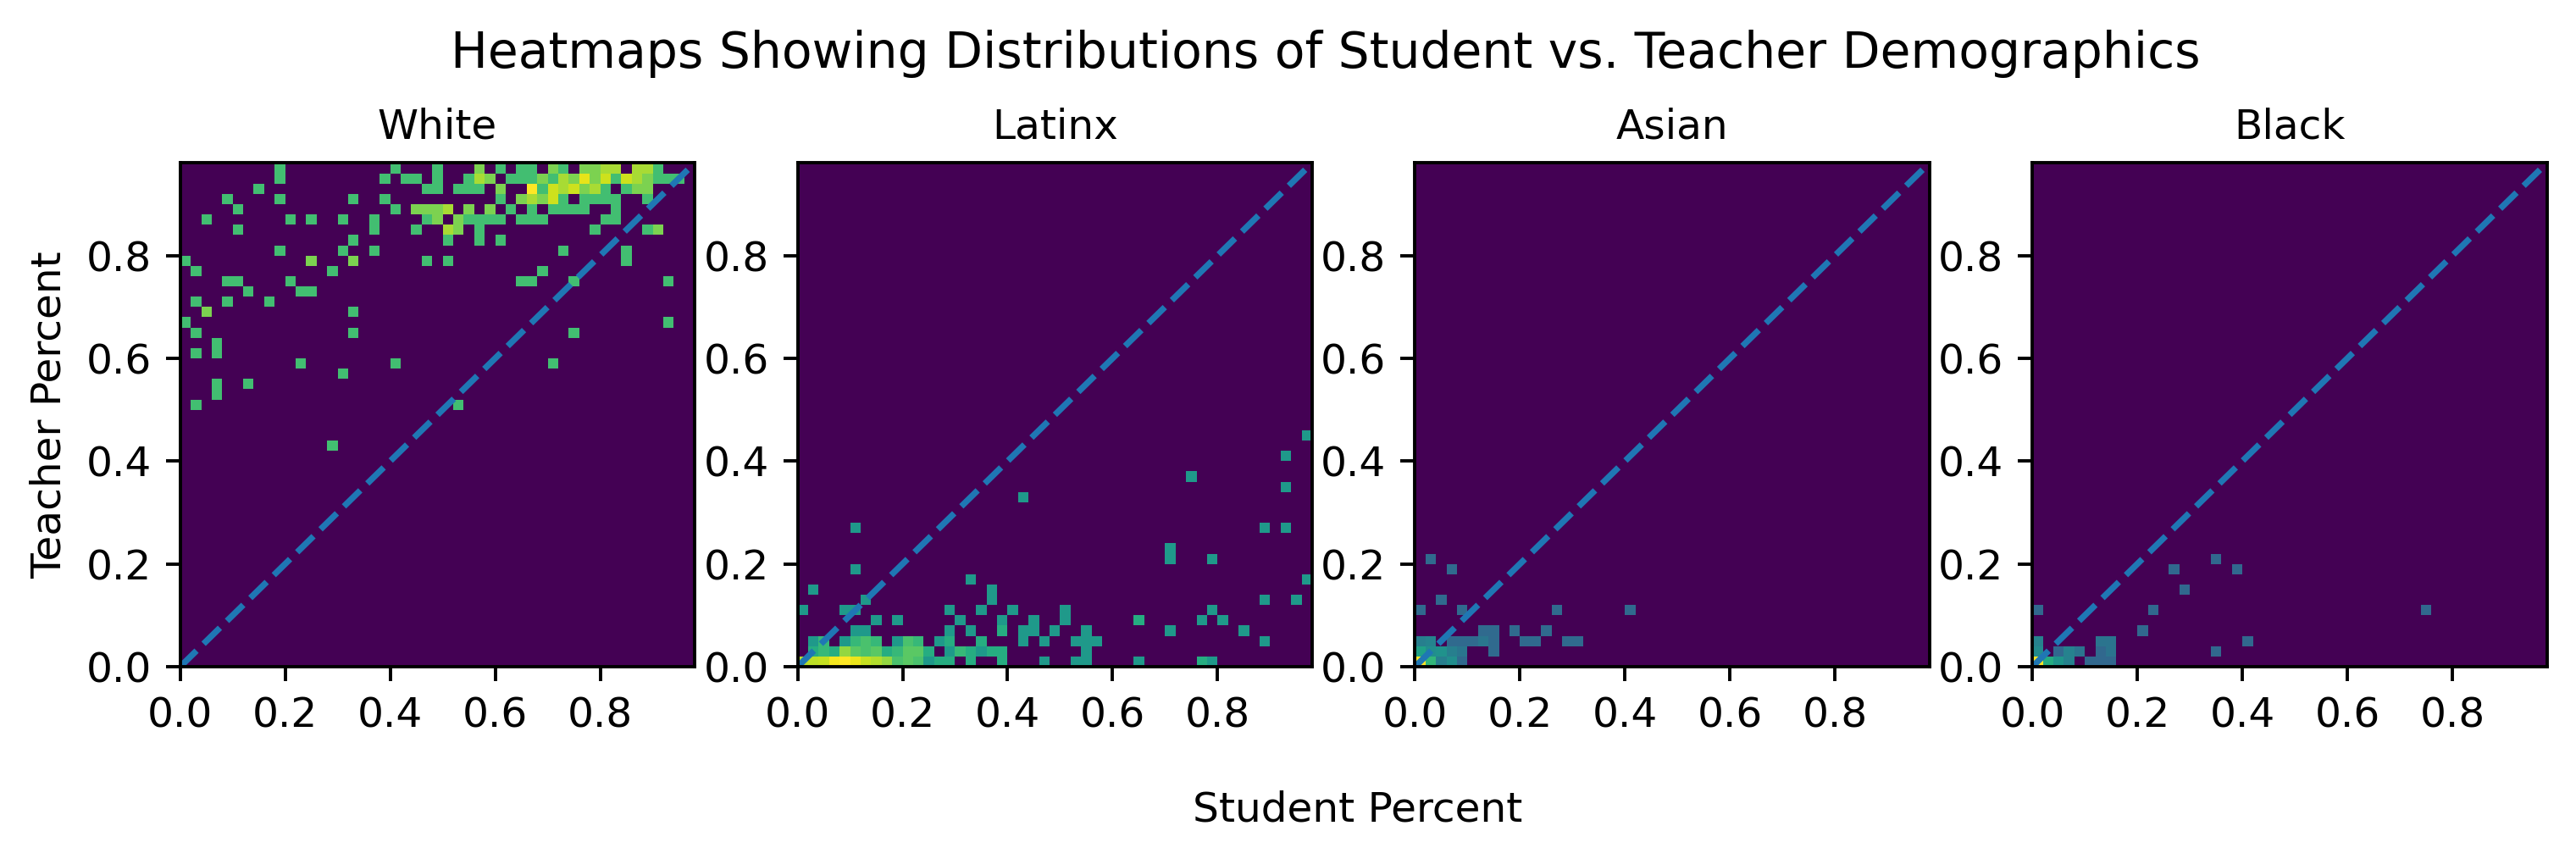

In [25]:
plt.figure(figsize=(10.3,2.25))

cols=['teacher_percent_white','teacher_percent_latinx','teacher_percent_asian','teacher_percent_black']
d=dict(zip(['teacher_percent_white','teacher_percent_latinx','teacher_percent_asian','teacher_percent_black'],
    ['percent_white','percent_latinx','percent_asian','percent_black']))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist2d(data=df, y=cols[i],x=d[cols[i]], bins=np.arange(0,1,.02), norm=mpl.colors.PowerNorm(.2))
    plt.plot([0,1], linestyle='--')
    plt.ylabel(ylabel='Teacher Percent' if i==0 else '')
    plt.title(cols[i].split('_')[2].title(), size=10)
    plt.xticks(np.arange(0,1,.2))

plt.text(x=-1.6,y=-.3,s='Student Percent')        
plt.suptitle('Heatmaps Showing Distributions of Student vs. Teacher Demographics', y=1.08)
#plt.tight_layout(rect=[0,0,1,1.1])

In [26]:
df['latinx_representation']=df.teacher_percent_latinx/df.percent_latinx

In [27]:
rep=(df.sort_values('latinx_representation', ascending=False)).query('latinx_representation.notnull()', engine='python')
print("Top quintile representation:")
display(rep.iloc[0:int(len(rep)/5)]\
        .describe()
       )
plt.figure()
print("Bottom 4 quintiles representation:")
display(rep.iloc[int(len(rep)/5):]\
        .describe()
       )

Top quintile representation:


student_FTE  total_spending  spending_per_student  num_teachers  \
count     60.000000    6.000000e+01             60.000000     60.000000   
mean    4862.389333    6.998875e+07          16174.918412    302.850000   
std     9073.881368    1.405560e+08           5713.850714    588.958167   
min       53.890000    1.417238e+06          11417.490818      6.000000   
25%      310.150000    5.038610e+06          13268.266286     22.750000   
50%      903.550000    1.289489e+07          14141.468303     62.000000   
75%     4491.402500    6.190856e+07          17264.575451    270.000000   
max    54537.390000    9.136878e+08          50076.212655   3745.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count              60.000000               60.000000              60.000000   
mean                0.019341                0.106594               0.800034   
std                 0.045235                0.108799               0.151734   
min                 0.000000                0.008979               0.437500   
25%                 0.000000                0.032006               0.695141   
50%                 0.001299                0.052778               0.859176   
75%                 0.010516                0.137987               0.933402   
max                 0.200000                0.446429               0.984287   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count              60.000000                            60.000000   
mean                0.023987                             0.025964   
std                 0.042999                             0.043307   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.008403                             0.008171   
75%                 0.025714                             0.040274   
max                 0.200000                             0.235294   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                      60.000000                     60.000000   
mean                        0.349383                      0.109467   
std                         0.205988                      0.099580   
min                         0.114000                      0.000000   
25%                         0.214000                      0.051000   
50%                         0.294500                      0.067000   
75%                         0.394500                      0.146750   
max                         1.000000                      0.429000   

       teacher_percent_out_of_field  ...  percent_latinx  percent_white  \
count                     60.000000  ...       60.000000      60.000000   
mean                       0.172200  ...        0.233552       0.554710   
std                        0.101347  ...        0.277344       0.310556   
min                        0.023000  ...        0.011236       0.020166   
25%                        0.086500  ...        0.073696       0.275218   
50%                        0.150500  ...        0.109975       0.667497   
75%                        0.250000  ...        0.289992       0.830956   
max                        0.412000  ...        0.977461       0.953368   

       percent_asian  students_testing_n  sbac_pass_all  sbac_pass_black  \
count      60.000000           48.000000      48.000000         6.000000   
mean        0.034499          433.375000       0.366083         0.235833   
std         0.071910          668.232207       0.178925         0.159177   
min         0.000000           10.000000       0.109000         0.093000   
25%         0.003903           46.000000       0.205000         0.159250   
50%         0.011992          150.500000       0.362000         0.184500   
75%         0.022005          519.250000       0.466000         0.241250   
max         0.407080         3610.000000       0.836000         0.542000   

      

Bottom 4 quintiles representation:


student_FTE  total_spending  spending_per_student  num_teachers  \
count    240.000000    2.400000e+02            240.000000    240.000000   
mean    3426.770161    4.864061e+07          16859.827298    208.125000   
std     5863.781250    8.415803e+07           6446.449020    350.732528   
min        9.100000    3.617032e+05          10245.313540      2.000000   
25%      245.007500    4.340689e+06          13602.998689     21.750000   
50%      961.890000    1.370118e+07          14655.611359     61.500000   
75%     3464.465000    4.705867e+07          16585.218888    207.750000   
max    30917.280000    4.569661e+08          53609.980925   1967.000000   

       teacher_percent_black  teacher_percent_latinx  teacher_percent_white  \
count             240.000000              240.000000             240.000000   
mean                0.006640                0.020412               0.926535   
std                 0.016459                0.029090               0.070450   
min                 0.000000                0.000000               0.588235   
25%                 0.000000                0.000000               0.891006   
50%                 0.000000                0.009597               0.942857   
75%                 0.006728                0.031177               0.981566   
max                 0.153846                0.172185               1.000000   

       teacher_percent_asian  teacher_percent_unknown_demographic  \
count             240.000000                           240.000000   
mean                0.009771                             0.016590   
std                 0.016952                             0.041901   
min                 0.000000                             0.000000   
25%                 0.000000                             0.000000   
50%                 0.000000                             0.000000   
75%                 0.013988                             0.016509   
max                 0.111111                             0.407407   

       teacher_percent_inexperienced  teacher_percent_limited_cert  \
count                     240.000000                    240.000000   
mean                        0.249275                      0.071737   
std                         0.117967                      0.069221   
min                         0.000000                      0.000000   
25%                         0.178250                      0.033000   
50%                         0.239500                      0.057000   
75%                         0.302000                      0.091250   
max                         0.667000                      0.538000   

       teacher_percent_out_of_field  ...  percent_latinx  percent_white  \
count                    240.000000  ...      240.000000     240.000000   
mean                       0.138033  ...        0.215690       0.647090   
std                        0.087149  ...        0.196354       0.220785   
min                        0.000000  ...        0.005747       0.005814   
25%                        0.074750  ...        0.089852       0.513906   
50%                        0.122500  ...        0.147450       0.704253   
75%                        0.195500  ...        0.272397       0.815129   
max                        0.429000  ...        0.970173       0.971014   

       percent_asian  students_testing_n  sbac_pass_all  sbac_pass_black  \
count     240.000000          178.000000     178.000000        22.000000   
mean        0.022365          321.747191       0.359124         0.209818   
std         0.042094          453.290815       0.136128         0.082335   
min         0.000000           10.000000       0.095000         0.111000   
25%         0.002593           54.000000       0.260750         0.130250   
50%         0.008709          130.500000       0.349500         0.186500   
75%         0.019877          363.500000       0.442750         0.275500   
max         0.298698         1950.000000       0.800000         0.364000   

      

<Figure size 2100x1400 with 0 Axes>

R^2:  0.10780989773518879 coef:  [-0.51214847]


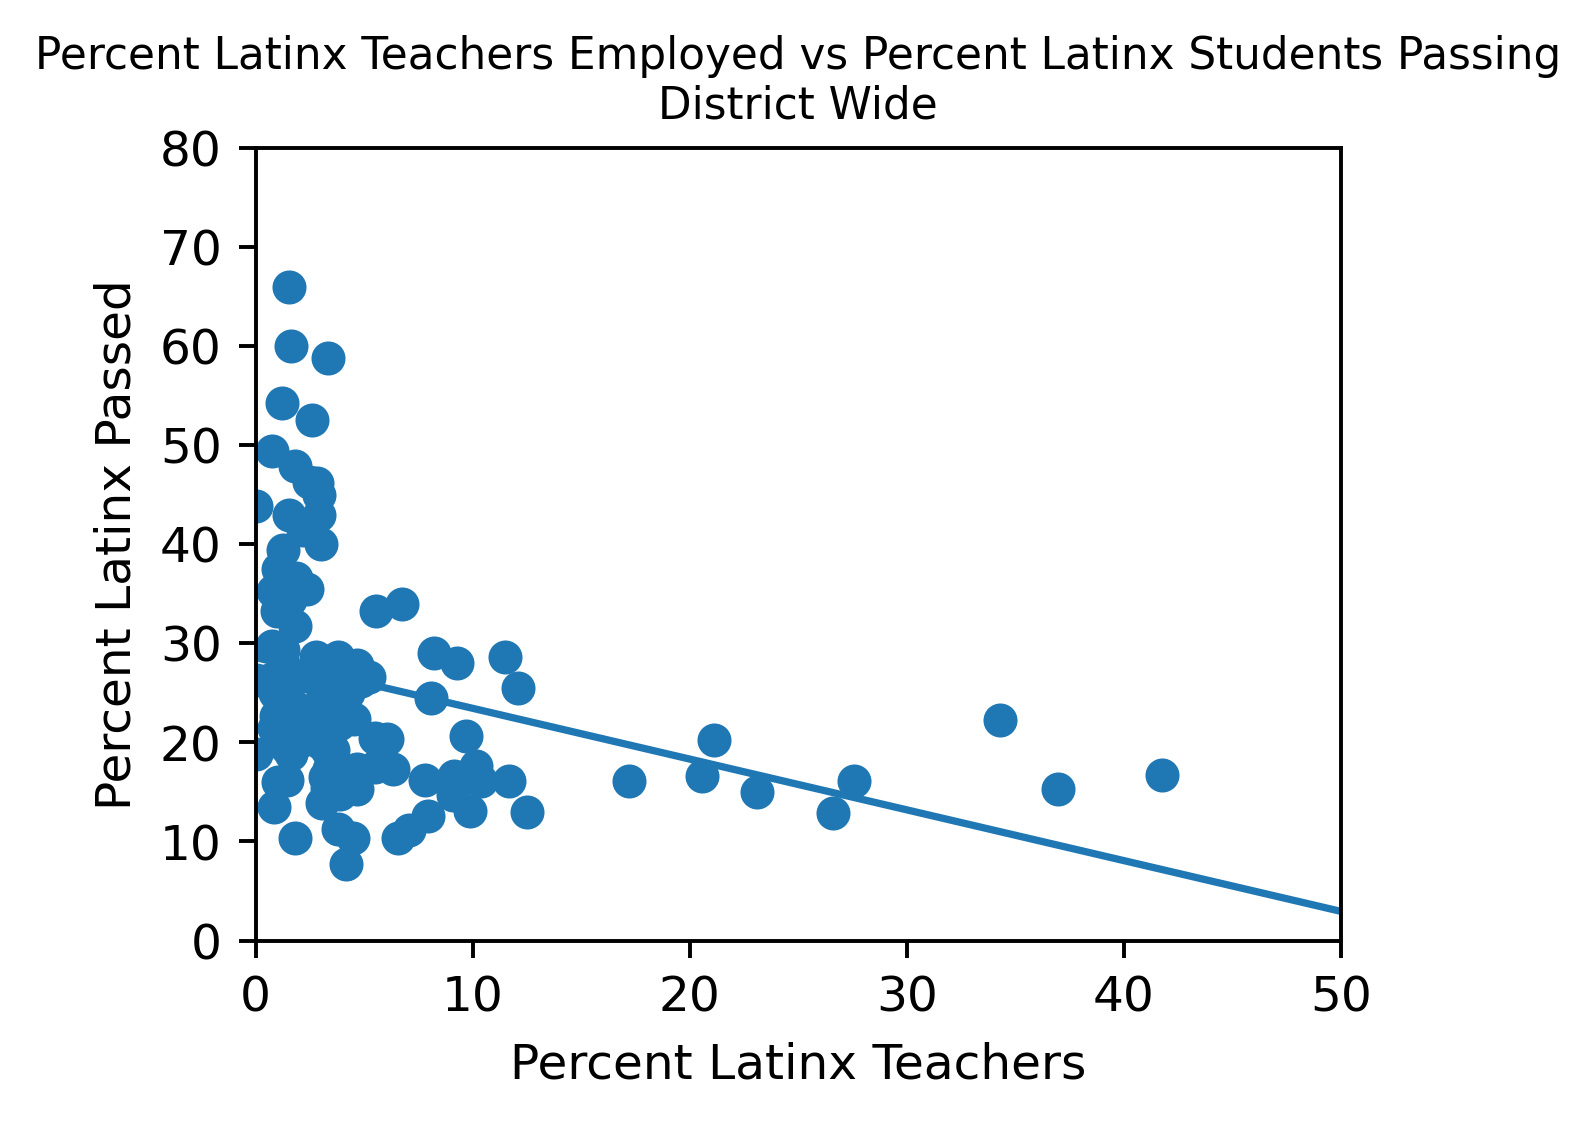

In [28]:
from sklearn.linear_model import LinearRegression

subset=df[df.sbac_pass_latinx.notnull()]

x=subset[['teacher_percent_latinx']]
y=subset['sbac_pass_latinx']

regr=LinearRegression().fit(x,y)
m=regr.coef_
c=regr.intercept_, 
r2=regr.score(x,y)

fig=plt.figure(figsize=(4,3))
plt.scatter(data=rep, x='teacher_percent_latinx', y='sbac_pass_latinx');
plt.plot([c[0],m[0]+c[0]])
plt.xlim(0,.5)
plt.ylim(bottom=0)
plt.ylabel('Percent Latinx Passed')
plt.xlabel('Percent Latinx Teachers')
plt.title('Percent Latinx Teachers Employed vs Percent Latinx Students Passing\nDistrict Wide', y=1, fontsize=9)

plt.xticks(plt.xticks()[0], labels=(plt.xticks()[0]*100).astype(int))
plt.yticks(plt.yticks()[0], labels=(plt.yticks()[0]*100).astype(int))


print('R^2: ', r2, "coef: ", m)

R^2:  0.16483197850333597 coef:  [1.07963899]


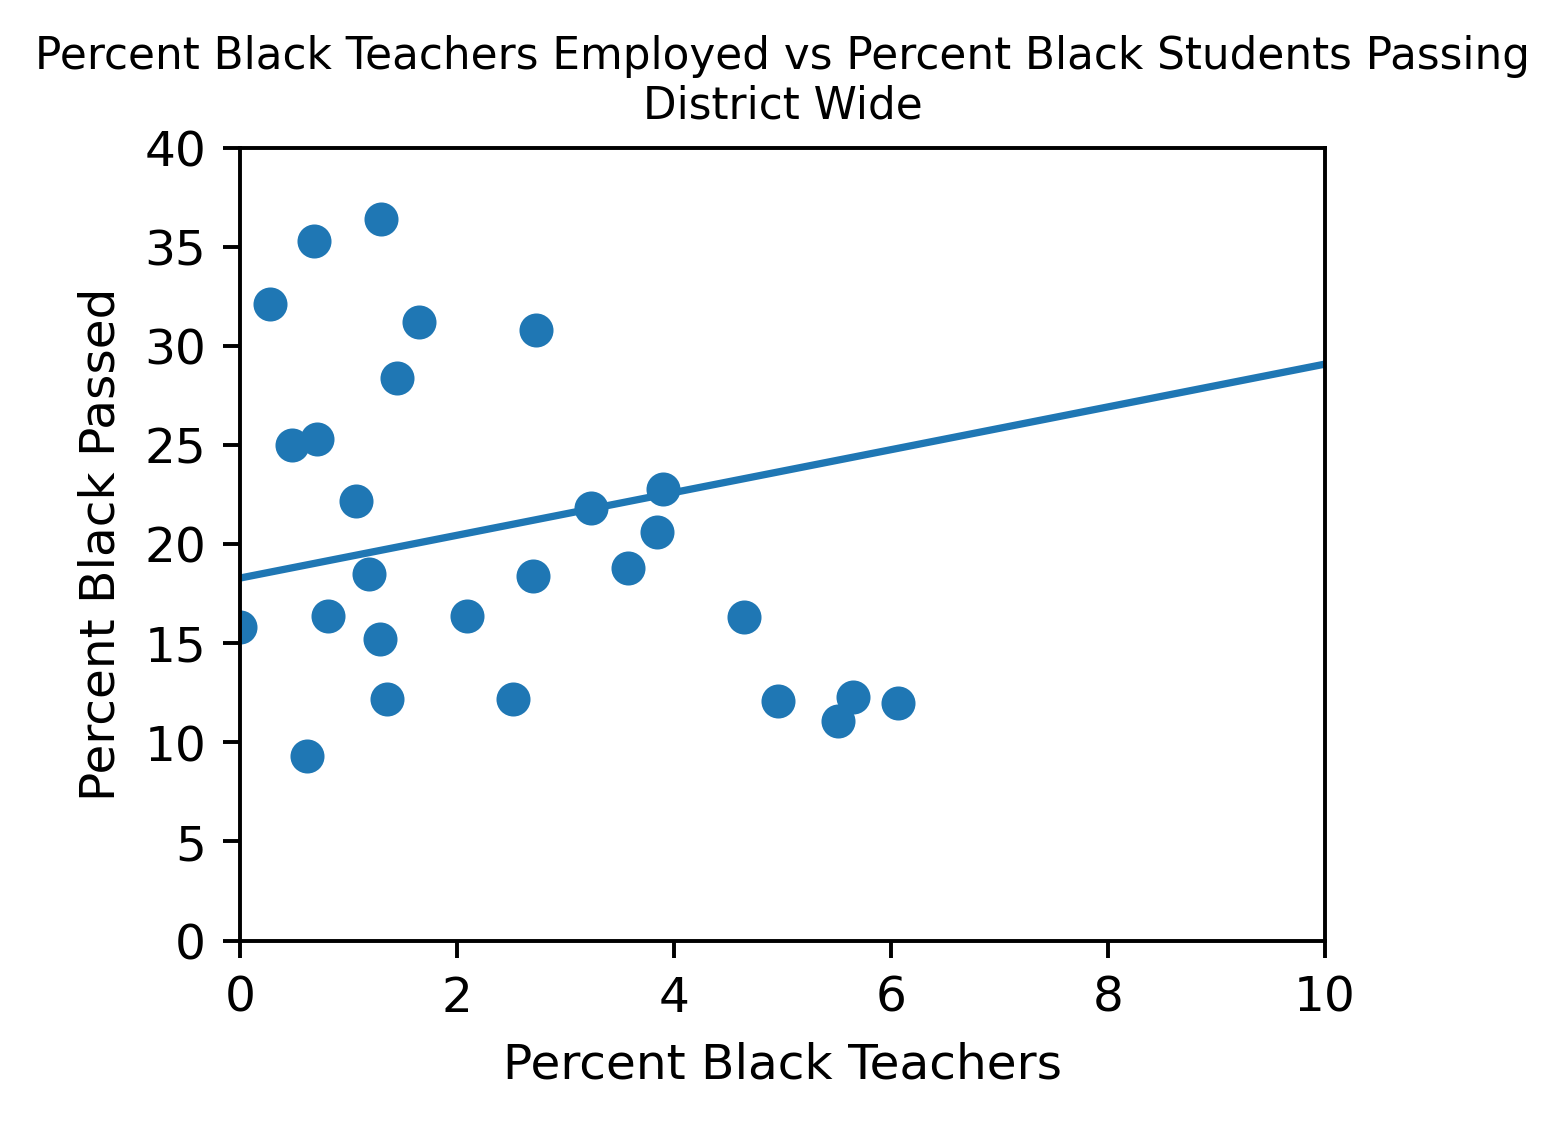

In [29]:
subset=df[df.sbac_pass_black.notnull()]

x=subset[['teacher_percent_black']]
y=subset['sbac_pass_black']

regr=LinearRegression().fit(x,y)
m=regr.coef_
c=regr.intercept_, 
r2=regr.score(x,y)

fig=plt.figure(figsize=(4,3))
plt.scatter(data=rep, x='teacher_percent_black', y='sbac_pass_black');
plt.plot([c[0],m[0]+c[0]])
plt.xlim(0,.1)
plt.ylim(0,.4)
plt.ylabel('Percent Black Passed')
plt.xlabel('Percent Black Teachers')
plt.title('Percent Black Teachers Employed vs Percent Black Students Passing\nDistrict Wide', y=1, fontsize=9)

plt.xticks(plt.xticks()[0], labels=(plt.xticks()[0]*100).astype(int))
plt.yticks(plt.yticks()[0], labels=(plt.yticks()[0]*100).astype(int))


print('R^2: ', r2, "coef: ", m)

In [30]:
import statsmodels.api as sms

x=df[['percent_latinx', 'percent_black', 'percent_asian', 'percent_white']]
y=df['teacher_percent_inexperienced']
x=sms.add_constant(x)

model = sms.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     teacher_percent_inexperienced   R-squared:                       0.314
Model:                                       OLS   Adj. R-squared:                  0.304
Method:                            Least Squares   F-statistic:                     34.49
Date:                           Tue, 22 Feb 2022   Prob (F-statistic):           1.02e-23
Time:                                   13:01:45   Log-Likelihood:                 207.81
No. Observations:                            307   AIC:                            -405.6
Df Residuals:                                302   BIC:                            -387.0
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3404      0.043      7.870      0.000       0.255       0.425
percent_latinx    -0.0230      0.053     -0.434      0.664      -0.127       0.081
percent_black      1.0016      0.117      8.536      0.000       0.771       1.233
percent_asian     -0.2512      0.157     -1.602      0.110      -0.560       0.057
percent_white     -0.1390      0.049     -2.859      0.005      -0.235      -0.043
==============================================================================
Omnibus:                       43.584   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.279
Skew:                           0.709   Prob(JB):                     4.56e-22
Kurtosis:                       5.381   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
import statsmodels.api as sms

subset['intercept']=1

x=subset[['percent_latinx', 
          'percent_black', 
          'percent_asian', 
          'percent_white']]*100 
y=subset['teacher_percent_limited_cert']*100
x=sms.add_constant(x)

model = sms.OLS(y,x).fit()

model.summary()

/var/folders/8_/jvx5y17n75x286y5ks8dnlgc0000gp/T/ipykernel_14658/3831954462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['intercept']=1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     teacher_percent_limited_cert   R-squared:                       0.318
Model:                                      OLS   Adj. R-squared:                  0.200
Method:                           Least Squares   F-statistic:                     2.684
Date:                          Tue, 22 Feb 2022   Prob (F-statistic):             0.0569
Time:                                  13:01:45   Log-Likelihood:                -67.355
No. Observations:                            28   AIC:                             144.7
Df Residuals:                                23   BIC:                             151.4
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8675     11.850      1.001      0.327     -12.647      36.382
percent_latinx     0.0246      0.158      0.156      0.878      -0.303       0.352
percent_black      0.0193      0.163      0.118      0.907      -0.318       0.357
percent_asian     -0.2100      0.141     -1.485      0.151      -0.503       0.082
percent_white     -0.1161      0.134     -0.867      0.395      -0.393       0.161
==============================================================================
Omnibus:                        1.595   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.522
Skew:                          -0.122   Prob(JB):                        0.770
Kurtosis:                       3.622   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
import statsmodels.api as sms

subset['intercept']=1

x=subset[['percent_latinx', 
          'percent_black', 
          'percent_asian', 
          'percent_white']]*100 
y=subset['teacher_percent_out_of_field']*100
x=sms.add_constant(x)

model = sms.OLS(y,x).fit()

model.summary()

/var/folders/8_/jvx5y17n75x286y5ks8dnlgc0000gp/T/ipykernel_14658/1872562499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['intercept']=1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     teacher_percent_out_of_field   R-squared:                       0.767
Model:                                      OLS   Adj. R-squared:                  0.726
Method:                           Least Squares   F-statistic:                     18.89
Date:                          Tue, 22 Feb 2022   Prob (F-statistic):           5.31e-07
Time:                                  13:01:45   Log-Likelihood:                -76.502
No. Observations:                            28   AIC:                             163.0
Df Residuals:                                23   BIC:                             169.7
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -24.0576     16.429     -1.464      0.157     -58.043       9.928
percent_latinx     0.2273      0.219      1.036      0.311      -0.227       0.681
percent_black      1.1978      0.226      5.295      0.000       0.730       1.666
percent_asian      0.1257      0.196      0.641      0.528      -0.280       0.531
percent_white      0.3786      0.186      2.038      0.053      -0.006       0.763
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.437
Skew:                           0.218   Prob(JB):                        0.804
Kurtosis:                       2.570   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
correct_pct=df[['percent_latinx',
                'percent_white',
                'percent_black',
                'percent_asian',
                'teacher_percent_inexperienced',
                'teacher_percent_out_of_field',
                'teacher_percent_limited_cert']]*100
correct_pct['spending_per_student']=df['spending_per_student']

"""
x=df[[#'sbac_pass_all',
          'percent_latinx',
          'percent_black',
          'percent_white',
          'percent_asian']]*100
y=df['spending_per_student']
x=sms.add_constant(x)
"""

model = sms.OLS.from_formula(formula="spending_per_student ~ percent_latinx+percent_white+percent_black+percent_asian", 
                             data=correct_pct).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     spending_per_student   R-squared:                       0.096
Model:                              OLS   Adj. R-squared:                  0.084
Method:                   Least Squares   F-statistic:                     8.013
Date:                  Tue, 22 Feb 2022   Prob (F-statistic):           3.76e-06
Time:                          13:01:45   Log-Likelihood:                -3132.0
No. Observations:                   307   AIC:                             6274.
Df Residuals:                       302   BIC:                             6293.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.692e+04   2293.829     11.736      0.000    2.24e+04    3.14e+04
percent_latinx  -131.0995     28.127     -4.661      0.000    -186.449     -75.750
percent_white    -95.4533     25.797     -3.700      0.000    -146.218     -44.688
percent_black    -62.1448     62.235     -0.999      0.319    -184.613      60.324
percent_asian   -359.0094     83.152     -4.317      0.000    -522.640    -195.378
==============================================================================
Omnibus:                      202.119   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1429.717
Skew:                           2.800   Prob(JB):                    3.47e-311
Kurtosis:                      11.967   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

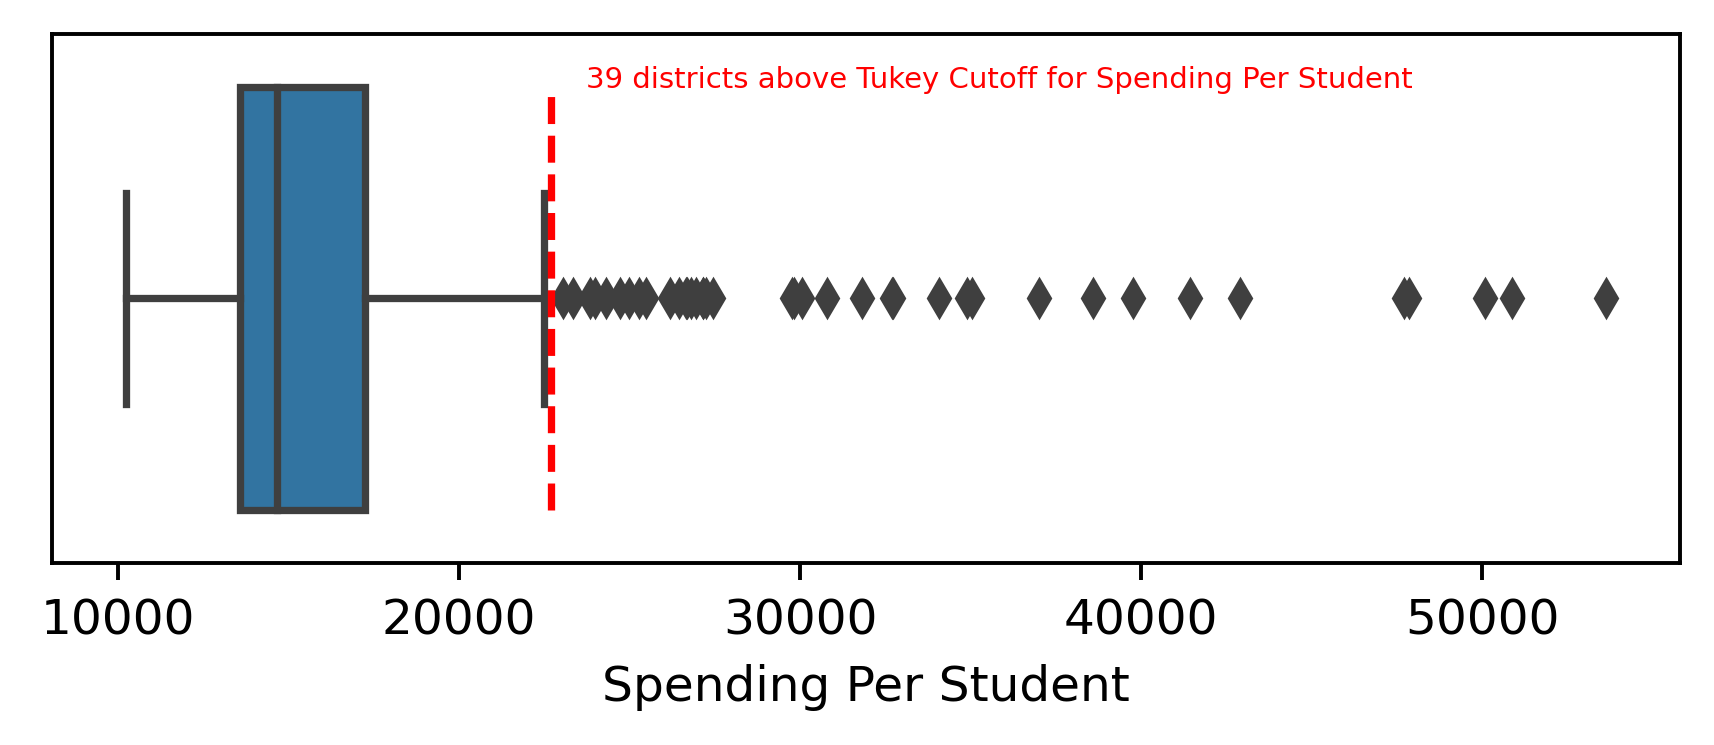

In [34]:
stats=df.spending_per_student.describe()
IQR=stats['75%'] - stats['25%']
tukey_cutoff=stats['75%']+1.5*IQR

plt.figure(figsize=(6,2))

ax=sns.boxplot(x=df.spending_per_student)
plt.plot([tukey_cutoff, tukey_cutoff],[.4,-.4], linestyle='--', c='r')

plt.text(x=tukey_cutoff+1000,y=-.4,s='39 districts above Tukey Cutoff for Spending Per Student', size=6, c='r')
plt.xlabel(ax.get_xlabel().replace("_", " ").title(),)
plt.yticks([]);

Agglomerative Clustering (abandoned)

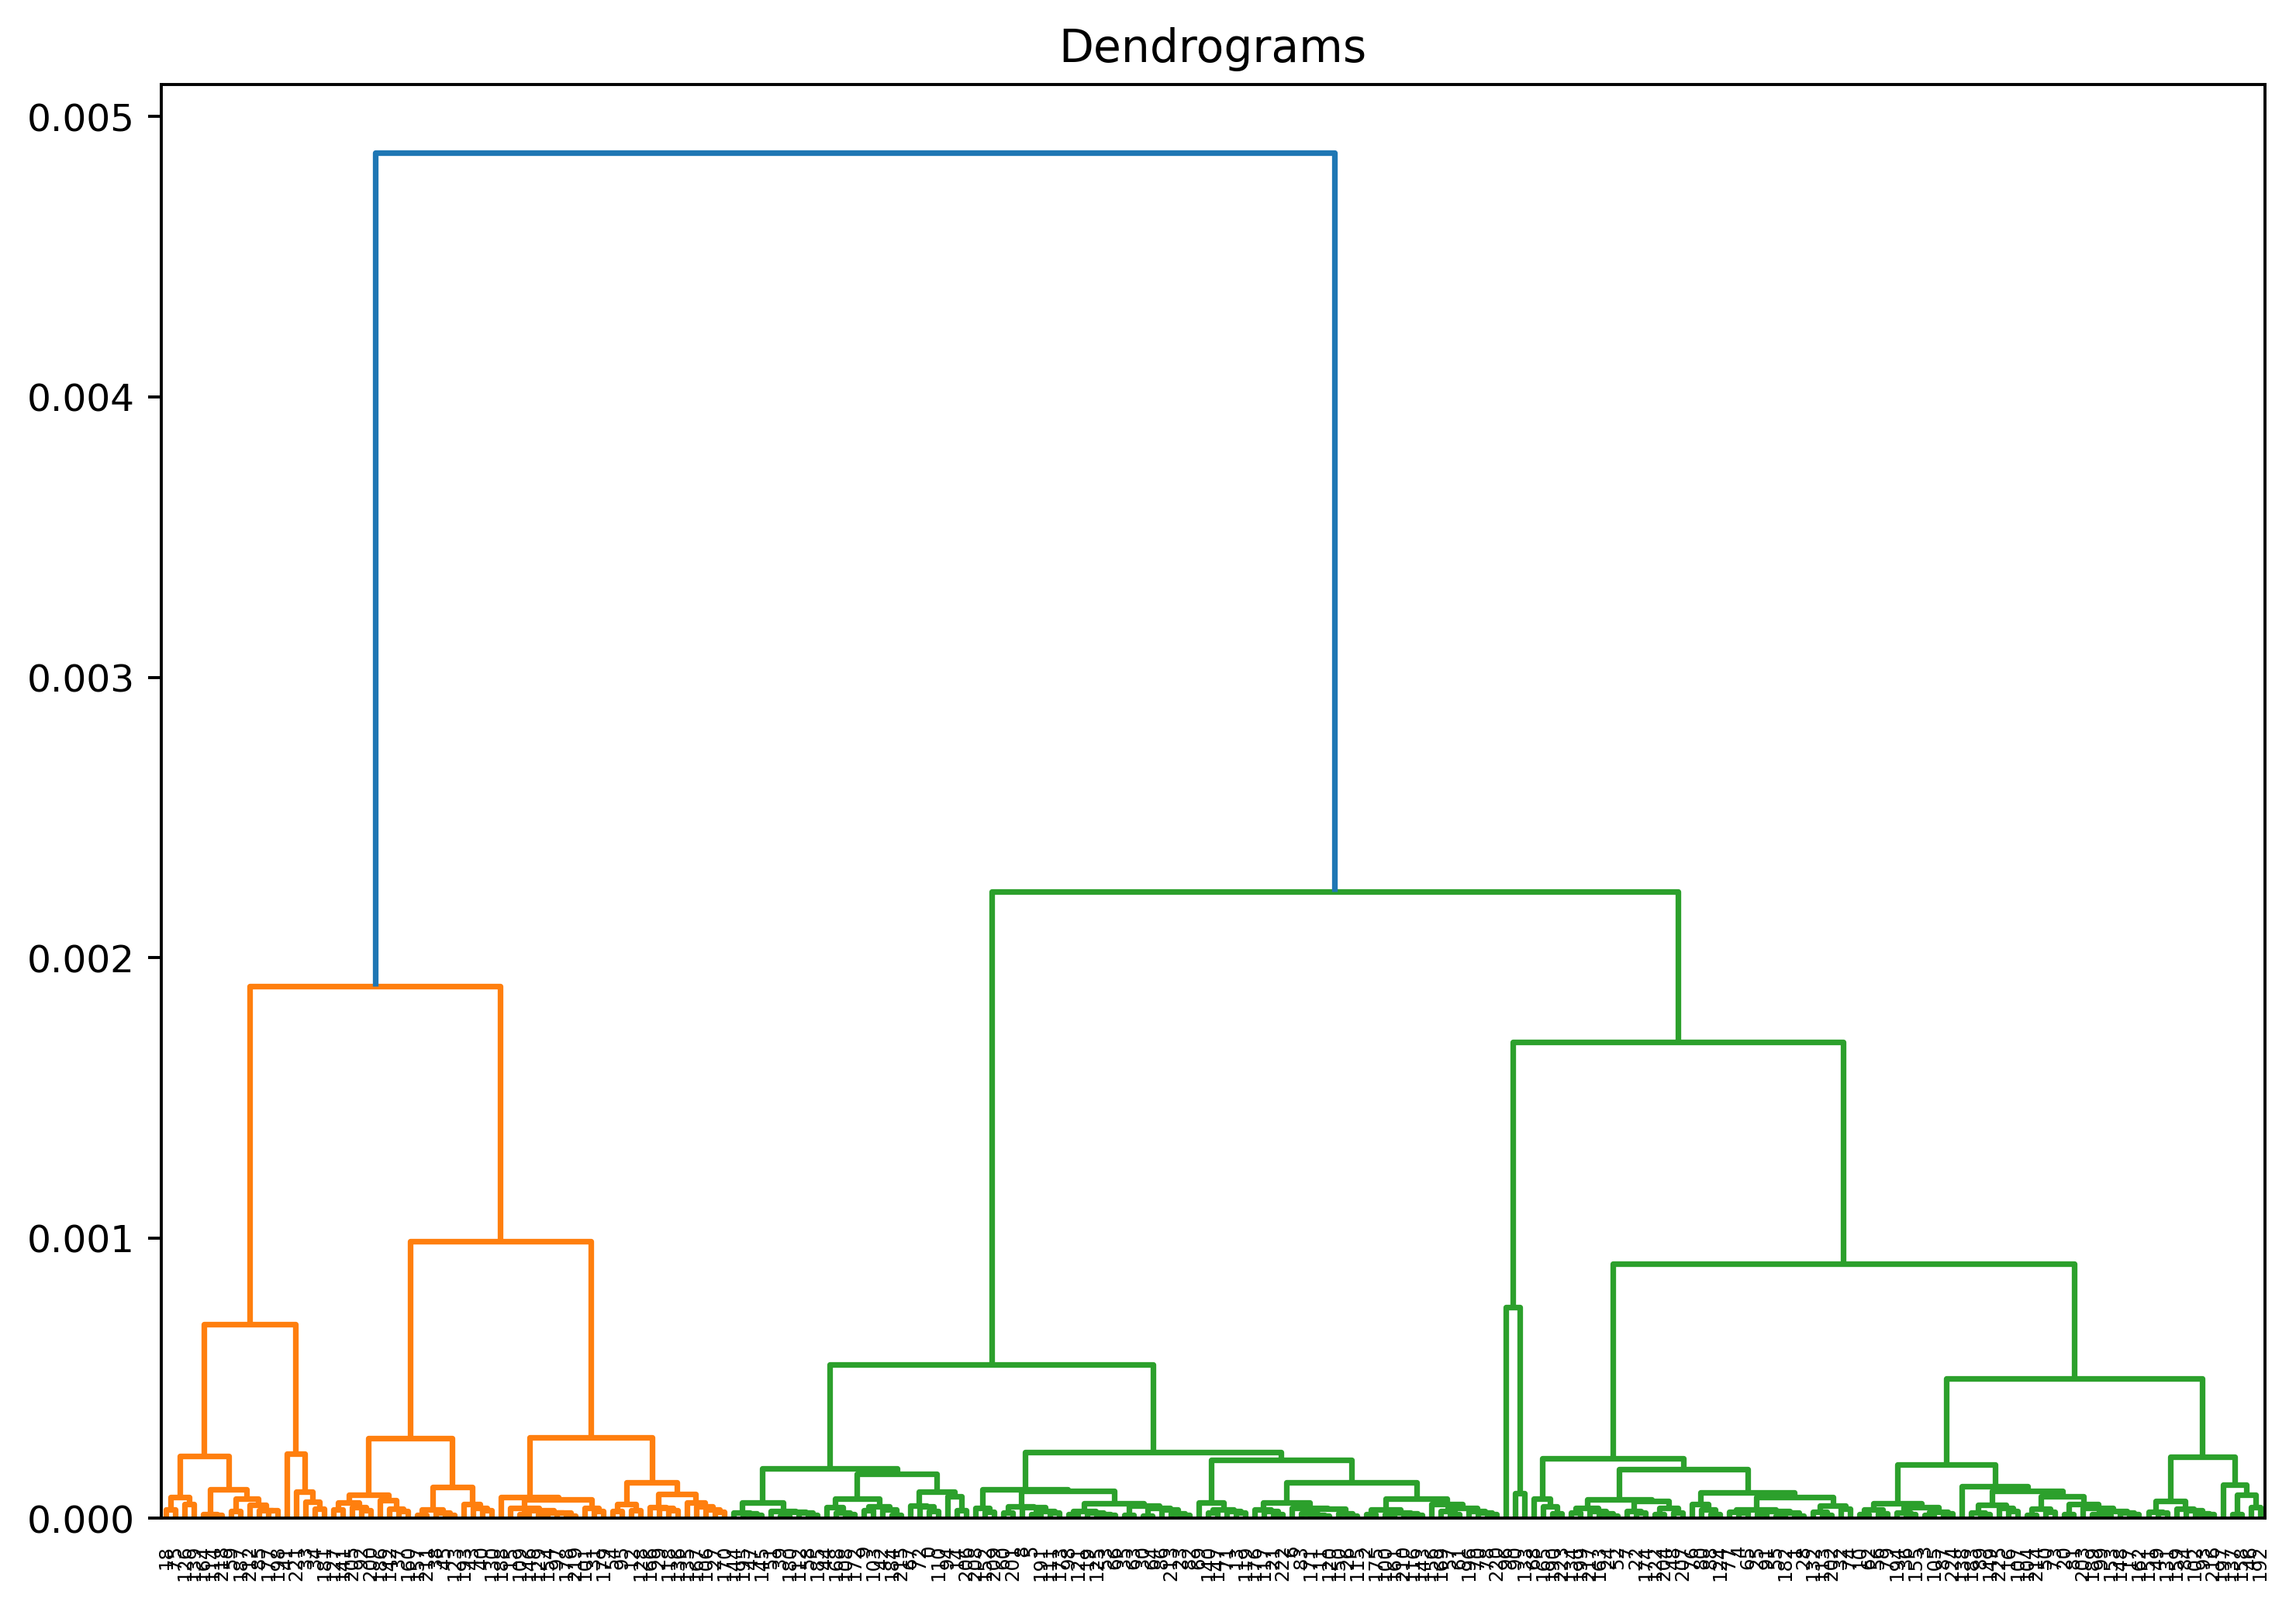

In [96]:
"""import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(to_cluster_normed, method='ward'))"""

In [97]:
"""from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(to_cluster_normed)"""

array([2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 3, 2, 0, 2,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 3, 3, 2, 0, 1, 1, 2, 1, 3, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 3, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 2, 0, 3, 2, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 0, 3, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 3, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 3, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 3, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 3, 1, 1, 2, 3, 0, 0, 2, 2, 1, 3, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0,
       3, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 3, 2, 0, 2, 0, 0, 3, 1,
       2, 3, 2, 0, 0, 0])